In [1]:
import os, sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import MaaSSim

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
#!pip install MaaSSim
import MaaSSim.utils
import logging
from dotmap import DotMap
import MaaSSim.simulators
from MaaSSim.data_structures import structures as inData
from MaaSSim.day_to_day import driver_opt_out, S_driver_opt_out, traveller_opt_out, S_traveller_opt_out
from MaaSSim.day_to_day import traveller_opt_out
from MaaSSim.day_to_day import d2d_kpi_veh
from MaaSSim.day_to_day import d2d_kpi_pax

Using TensorFlow backend.


In [4]:
import osmnx as ox
import networkx as nx
import random
import math
import pandas as pd
import matplotlib.pyplot as plt          
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [5]:
# the setting for TRB results do not delete
params = MaaSSim.utils.get_config('glance.json')
params.city = "Amsterdam, Netherlands"
params.paths.G = "../../data/graphs/Amsterdam.graphml"
params.paths.skim = "../../data/graphs/Amsterdam.csv"
params.vehicle_fixed_positions = True
params.times.patience = 600 #second
params.dist_threshold = 20000 #meter
params.dist_threshold_min = 2000 #meter

params.d2d.probabilistic = True
params.d2d.heterogeneous = False
params.d2d.ini_att = 0.01 #0.5
params.d2d.B_income = 1
params.d2d.fuel_cost = 0.25 #euro/km

params.d2d.B_inveh_time = 1
params.d2d.B_exp_time = 2 #1.5 in oded's paper
params.PT_fare = 1 ## euro
params.PT_avg_speed = 6

params.nPM = 1 # number of platforms. platform id starts from 1
params.platforms.base_fare = 1.4 #euro
params.platforms.fare = float(1.20) #euro/km
params.platforms.min_fare = float(2) # euro
params.platforms.comm_rate = float(0.10)
params.platforms.discount = float(0.0) # float(0.0)
params.platforms.daily_marketing = False

params.d2d.learning_d = 1 #for TRB 
params.d2d.B_Experience = 0.80
params.d2d.B_WOM = 0.2
params.d2d.B_Marketing = 0.0
params.d2d.diffusion_speed = 10/100 # speed for M is twice greater than WOM.
params.d2d.m = 5 #for TRB
params.d2d.Eini_att = 0.01
params.d2d.adj_s = 2
params.VoT = 10.63 # value of time per hour
params.seed = 1
params.assert_me = False
params.paths.requests = 'Amsterdam_requests.csv'

params.nP = 2000
params.nV = 200
params.nD = 400
params.simTime = 4
params.d2d.res_wage = params.simTime*10.63 #euro

In [6]:
sim_rln_train,agent = MaaSSim.simulators.simulate_RLn_with_agent(params=params, f_driver_out=S_driver_opt_out,f_trav_out=S_traveller_opt_out,kpi_veh=d2d_kpi_veh,kpi_pax=d2d_kpi_pax, logger_level=logging.WARNING)

This simulation uses albatros data


[2023-04-09 21:22:29,570] Setting up 4h simulation at 2023-04-09 19:22:04 for 200 vehicles and 2000 passengers in Amsterdam, Netherlands


initialization-----------------------
state_size =  2   action_size =  3   Lever = Commission   step =  0.05
fare =  1.2   comm_rate =  0.1   disc =  0.0   marketing = 0-100
-------------------------------------
---------------1585------------------
-------------------------------------
Day =  0
comm_rate =  0.15


[2023-04-09 21:22:38,085] simulation time 3.5 s


nP =  0    nV =  0
revenue =  0.0    npnv =  0.0
reward: 0.0
mean reward so far: nan
mean revenue so far: nan
Day =  1
comm_rate =  0.1


[2023-04-09 21:22:47,111] simulation time 3.9 s


nP =  13    nV =  1
revenue =  0.0004883772727272726    npnv =  0.009774999999999999
reward: 8.66443
mean reward so far: 0.0
mean revenue so far: 0.0
Day =  2
comm_rate =  0.1


[2023-04-09 21:22:57,083] simulation time 4.6 s


nP =  38    nV =  6
revenue =  0.0015056068181818181    npnv =  0.04165
reward: 35.652335
mean reward so far: 4.332215
mean revenue so far: 4.29772
Day =  3
comm_rate =  0.15


[2023-04-09 21:23:07,779] simulation time 5.2 s


nP =  61    nV =  8
revenue =  0.0042557181818181815    npnv =  0.059925000000000006
reward: 55.89258
mean reward so far: 14.772255000000001
mean revenue so far: 11.69804
Day =  4
comm_rate =  0.2


[2023-04-09 21:23:19,030] simulation time 6.1 s


nP =  92    nV =  12
revenue =  0.007475990909090909    npnv =  0.0901
reward: 86.40718
mean reward so far: 25.052336250000003
mean revenue so far: 27.49869
Day =  5
comm_rate =  0.25


[2023-04-09 21:23:30,779] simulation time 6.3 s


nP =  94    nV =  11
revenue =  0.009627846590909091    npnv =  0.0867
reward: 88.50126250000001
mean reward so far: 37.323305000000005
mean revenue so far: 48.314440000000005
Day =  6
comm_rate =  0.25


[2023-04-09 21:23:42,423] simulation time 6.2 s


nP =  104    nV =  10
revenue =  0.011733329545454543    npnv =  0.0867
reward: 93.13332500000001
mean reward so far: 45.85296458333334
mean revenue so far: 68.50371666666668
Day =  7
comm_rate =  0.2


[2023-04-09 21:23:54,440] simulation time 6.7 s


nP =  124    nV =  9
revenue =  0.01060119090909091    npnv =  0.09094999999999999
reward: 93.94262
mean reward so far: 52.60730178571429
mean revenue so far: 88.21841428571429
Day =  8
comm_rate =  0.15


[2023-04-09 21:24:06,577] simulation time 6.9 s


nP =  127    nV =  10
revenue =  0.00776485909090909    npnv =  0.096475
reward: 91.99269
mean reward so far: 57.7742165625
mean revenue so far: 100.5137325
Day =  9
comm_rate =  0.15


[2023-04-09 21:24:18,794] simulation time 6.8 s


nP =  121    nV =  18
revenue =  0.0074284738636363635    npnv =  0.12792499999999998
reward: 115.6726425
mean reward so far: 61.57626916666667
mean revenue so far: 104.53015333333333
Day =  10
comm_rate =  0.2


[2023-04-09 21:24:30,701] simulation time 6.6 s


nP =  113    nV =  19
revenue =  0.009489713636363636    npnv =  0.128775
reward: 120.86737
mean reward so far: 66.98590650000001
mean revenue so far: 107.151252
Day =  11
comm_rate =  0.25


[2023-04-09 21:24:42,877] simulation time 6.8 s


nP =  120    nV =  16
revenue =  0.01302760227272727    npnv =  0.11900000000000001
reward: 121.060725
mean reward so far: 71.88422136363637
mean revenue so far: 112.59377090909092
Day =  12
comm_rate =  0.2


[2023-04-09 21:24:55,625] simulation time 7.3 s


nP =  141    nV =  14
revenue =  0.011748722727272726    npnv =  0.119425
reward: 118.57719
mean reward so far: 75.98226333333334
mean revenue so far: 122.31810666666668
Day =  13
comm_rate =  0.15


[2023-04-09 21:25:08,966] simulation time 8.1 s


nP =  166    nV =  21
revenue =  0.011057212499999998    npnv =  0.1598
reward: 148.4058675
mean reward so far: 79.25879615384616
mean revenue so far: 128.81498461538465
Day =  14
comm_rate =  0.1


[2023-04-09 21:25:21,659] simulation time 7.5 s


nP =  169    nV =  9
revenue =  0.00700941590909091    npnv =  0.110075
reward: 100.890715
mean reward so far: 84.19787267857143
mean revenue so far: 133.51441000000003
Day =  15
comm_rate =  0.15


[2023-04-09 21:25:35,446] simulation time 8.3 s


nP =  176    nV =  20
revenue =  0.010486619318181817    npnv =  0.1598
reward: 147.1505625
mean reward so far: 85.31072883333333
mean revenue so far: 132.8378306666667
Day =  16
comm_rate =  0.1


[2023-04-09 21:25:48,476] simulation time 7.6 s


nP =  152    nV =  18
revenue =  0.0060928727272727265    npnv =  0.14109999999999998
reward: 122.96431999999999
mean reward so far: 89.1757184375
mean revenue so far: 136.07074749999998
Day =  17
comm_rate =  0.15


[2023-04-09 21:26:01,249] simulation time 7.5 s


nP =  167    nV =  10
revenue =  0.010684271590909091    npnv =  0.113475
reward: 111.6153975
mean reward so far: 91.16328323529412
mean revenue so far: 134.37450117647057
Day =  18
comm_rate =  0.15


[2023-04-09 21:26:14,223] simulation time 7.5 s


nP =  149    nV =  18
revenue =  0.009539174999999999    npnv =  0.13982499999999998
reward: 129.556185
mean reward so far: 92.29951180555555
mean revenue so far: 137.35609444444444
Day =  19
comm_rate =  0.2


[2023-04-09 21:26:27,718] simulation time 8.2 s


nP =  176    nV =  14
revenue =  0.014577822727272729    npnv =  0.1343
reward: 136.35121
mean reward so far: 94.26038934210526
mean revenue so far: 138.96311473684207
Day =  20
comm_rate =  0.25


[2023-04-09 21:26:41,417] simulation time 8.2 s


nP =  185    nV =  14
revenue =  0.019223767045454546    npnv =  0.138125
reward: 149.54228750000001
mean reward so far: 96.364930375
mean revenue so far: 144.84344299999998
Day =  21
comm_rate =  0.2


[2023-04-09 21:26:54,680] simulation time 7.7 s


nP =  158    nV =  20
revenue =  0.013086154545454547    npnv =  0.15214999999999998
reward: 146.92954
mean reward so far: 98.89718547619047
mean revenue so far: 154.05748380952377
Day =  22
comm_rate =  0.15


[2023-04-09 21:27:07,629] simulation time 7.7 s


nP =  156    nV =  17
revenue =  0.010461661363636363    npnv =  0.13855
reward: 130.595655
mean reward so far: 101.08047431818181
mean revenue so far: 157.5237945454545
Day =  23
comm_rate =  0.1


[2023-04-09 21:27:20,498] simulation time 7.4 s


nP =  143    nV =  14
revenue =  0.006221852272727272    npnv =  0.120275
reward: 107.07807500000001
mean reward so far: 102.36374304347827
mean revenue so far: 158.68037913043474
Day =  24
comm_rate =  0.05


[2023-04-09 21:27:33,698] simulation time 7.8 s


nP =  160    nV =  13
revenue =  0.0032670704545454546    npnv =  0.12325000000000001
reward: 102.88755500000002
mean reward so far: 102.56017354166666
mean revenue so far: 156.63138833333335
Day =  25
comm_rate =  0.1


[2023-04-09 21:27:46,800] simulation time 7.9 s


nP =  162    nV =  19
revenue =  0.007124972727272727    npnv =  0.14959999999999998
reward: 131.83494
mean reward so far: 102.57326880000001
mean revenue so far: 152.6661504
Day =  26
comm_rate =  0.15


[2023-04-09 21:27:59,931] simulation time 7.6 s


nP =  153    nV =  14
revenue =  0.0098514    npnv =  0.12452500000000001
reward: 118.36308000000001
mean reward so far: 103.69871769230771
mean revenue so far: 151.61743384615386
Day =  27
comm_rate =  0.2


[2023-04-09 21:28:12,908] simulation time 7.8 s


nP =  160    nV =  20
revenue =  0.013366727272727271    npnv =  0.153
reward: 148.2068
mean reward so far: 104.24184222222223
mean revenue so far: 152.42362666666668
Day =  28
comm_rate =  0.25


[2023-04-09 21:28:26,421] simulation time 7.9 s


nP =  166    nV =  17
revenue =  0.017554426136363637    npnv =  0.1428
reward: 149.4997375
mean reward so far: 105.8120192857143
mean revenue so far: 155.38186857142858
Day =  29
comm_rate =  0.3


[2023-04-09 21:28:39,631] simulation time 7.7 s


nP =  159    nV =  14
revenue =  0.02095633636363636    npnv =  0.12707500000000002
reward: 144.77394
mean reward so far: 107.31849232758621
mean revenue so far: 160.67759379310345
Day =  30
comm_rate =  0.35


[2023-04-09 21:28:52,838] simulation time 8.0 s


nP =  165    nV =  20
revenue =  0.023754030681818177    npnv =  0.15512499999999999
reward: 172.7088675
mean reward so far: 108.56700725
mean revenue so far: 167.616058
Day =  31
comm_rate =  0.35


[2023-04-09 21:29:06,017] simulation time 7.6 s


nP =  154    nV =  24
revenue =  0.021595103409090904    npnv =  0.16745000000000002
reward: 177.5292275
mean reward so far: 110.63609951612904
mean revenue so far: 175.69524774193548
Day =  32
comm_rate =  0.4


[2023-04-09 21:29:19,296] simulation time 8.0 s


nP =  169    nV =  22
revenue =  0.028477463636363637    npnv =  0.165325
reward: 191.02042
mean reward so far: 112.72650976562501
mean revenue so far: 182.082078125
Day =  33
comm_rate =  0.45


[2023-04-09 21:29:32,365] simulation time 7.5 s


nP =  149    nV =  20
revenue =  0.02739325909090909    npnv =  0.14832499999999998
reward: 175.43516999999997
mean reward so far: 115.0990525
mean revenue so far: 191.75242000000003
Day =  34
comm_rate =  0.45


[2023-04-09 21:29:45,150] simulation time 7.5 s


nP =  149    nV =  14
revenue =  0.02788465909090909    npnv =  0.12282500000000002
reward: 156.71625
mean reward so far: 116.87364419117648
mean revenue so far: 200.2926829411765
Day =  35
comm_rate =  0.4


[2023-04-09 21:29:58,304] simulation time 7.6 s


nP =  153    nV =  15
revenue =  0.023934627272727275    npnv =  0.128775
reward: 152.64618000000002
mean reward so far: 118.01200435714289
mean revenue so far: 208.5920348571429
Day =  36
comm_rate =  0.35


[2023-04-09 21:30:11,663] simulation time 7.9 s


nP =  164    nV =  18
revenue =  0.024035152272727272    npnv =  0.1462
reward: 166.397335
mean reward so far: 118.97406479166668
mean revenue so far: 214.499185
Day =  37
comm_rate =  0.3


[2023-04-09 21:30:25,091] simulation time 8.1 s


nP =  176    nV =  15
revenue =  0.021514363636363634    npnv =  0.13854999999999998
reward: 154.91159999999996
mean reward so far: 120.2557747972973
mean revenue so far: 220.13484702702706
Day =  38
comm_rate =  0.35


[2023-04-09 21:30:38,598] simulation time 7.9 s


nP =  167    nV =  13
revenue =  0.024710349999999996    npnv =  0.126225
reward: 152.37277
mean reward so far: 121.16777019736844
mean revenue so far: 224.3063721052632
Day =  39
comm_rate =  0.4


[2023-04-09 21:30:51,552] simulation time 7.7 s


nP =  155    nV =  14
revenue =  0.02573321818181818    npnv =  0.12537500000000001
reward: 153.96308000000002
mean reward so far: 121.9678983974359
mean revenue so far: 229.70626410256415
Day =  40
comm_rate =  0.35


[2023-04-09 21:31:04,918] simulation time 7.8 s


nP =  159    nV =  20
revenue =  0.022646757954545457    npnv =  0.152575
reward: 168.2928675
mean reward so far: 122.7677779375
mean revenue so far: 235.2862235
Day =  41
comm_rate =  0.3


[2023-04-09 21:31:18,065] simulation time 7.8 s


nP =  160    nV =  20
revenue =  0.019243854545454544    npnv =  0.153
reward: 161.13648
mean reward so far: 123.87814597560977
mean revenue so far: 239.26907024390246
Day =  42
comm_rate =  0.35


[2023-04-09 21:31:31,078] simulation time 7.5 s


nP =  168    nV =  10
revenue =  0.02504133068181818    npnv =  0.1139
reward: 143.53092750000002
mean reward so far: 124.76524916666668
mean revenue so far: 241.63627904761904
Day =  43
comm_rate =  0.35


[2023-04-09 21:31:43,918] simulation time 7.5 s


nP =  150    nV =  19
revenue =  0.022361873863636358    npnv =  0.1445
reward: 161.3961225
mean reward so far: 125.20166029069769
mean revenue so far: 246.26630558139533
Day =  44
comm_rate =  0.4


[2023-04-09 21:31:56,589] simulation time 7.3 s


nP =  154    nV =  10
revenue =  0.02678729090909091    npnv =  0.10795
reward: 142.75204000000002
mean reward so far: 126.02426170454547
mean revenue so far: 249.6140936363636
Day =  45
comm_rate =  0.35


[2023-04-09 21:32:10,261] simulation time 8.2 s


nP =  198    nV =  11
revenue =  0.028378970454545453    npnv =  0.1309
reward: 164.073735
mean reward so far: 126.39599011111113
mean revenue so far: 254.54392088888886
Day =  46
comm_rate =  0.4


[2023-04-09 21:32:23,269] simulation time 7.7 s


nP =  156    nV =  17
revenue =  0.025652536363636364    npnv =  0.13855
reward: 164.01558
mean reward so far: 127.21507152173915
mean revenue so far: 259.8683982608695
Day =  47
comm_rate =  0.4


[2023-04-09 21:32:35,930] simulation time 7.1 s


nP =  161    nV =  8
revenue =  0.026368618181818182    npnv =  0.10242499999999999
reward: 137.54095999999998
mean reward so far: 127.99806106382981
mean revenue so far: 263.94533957446805
Day =  48
comm_rate =  0.35


[2023-04-09 21:32:49,068] simulation time 7.8 s


nP =  155    nV =  15
revenue =  0.02293515795454545    npnv =  0.129625
reward: 151.1073475
mean reward so far: 128.19687145833333
mean revenue so far: 268.1149716666667
Day =  49
comm_rate =  0.35


[2023-04-09 21:33:02,680] simulation time 8.3 s


nP =  183    nV =  17
revenue =  0.025451379545454542    npnv =  0.150025
reward: 172.483035
mean reward so far: 128.66443219387756
mean revenue so far: 270.88117183673467
Day =  50
comm_rate =  0.3


[2023-04-09 21:33:15,733] simulation time 7.7 s


nP =  171    nV =  10
revenue =  0.021967915909090904    npnv =  0.115175
reward: 137.759415
mean reward so far: 129.54080425
mean revenue so far: 274.422434
Day =  51
comm_rate =  0.35


[2023-04-09 21:33:29,663] simulation time 8.4 s


nP =  185    nV =  15
revenue =  0.026767371590909087    npnv =  0.14237499999999997
reward: 169.43821749999998
mean reward so far: 129.70195348039218
mean revenue so far: 276.62268666666665
Day =  52
comm_rate =  0.4


[2023-04-09 21:33:43,129] simulation time 8.2 s


nP =  176    nV =  14
revenue =  0.028533145454545456    npnv =  0.1343
reward: 167.05292000000003
mean reward so far: 130.46611240384615
mean revenue so far: 280.3627453846154
Day =  53
comm_rate =  0.35


[2023-04-09 21:33:56,568] simulation time 7.8 s


nP =  163    nV =  14
revenue =  0.023954238636363638    npnv =  0.12877500000000003
reward: 152.689325
mean reward so far: 131.15642952830189
mean revenue so far: 284.54804
Day =  54
comm_rate =  0.4


[2023-04-09 21:34:09,460] simulation time 7.6 s


nP =  151    nV =  18
revenue =  0.023099472727272728    npnv =  0.14067499999999997
reward: 160.04883999999998
mean reward so far: 131.55518685185186
mean revenue so far: 287.0859392592593
Day =  55
comm_rate =  0.45


[2023-04-09 21:34:23,038] simulation time 8.2 s


nP =  180    nV =  17
revenue =  0.03297408749999999    npnv =  0.14875
reward: 188.04299249999997
mean reward so far: 132.0732532727273
mean revenue so far: 289.2580261818182
Day =  56
comm_rate =  0.4


[2023-04-09 21:34:36,126] simulation time 7.5 s


nP =  153    nV =  13
revenue =  0.025349345454545452    npnv =  0.120275
reward: 149.15856000000002
mean reward so far: 133.0727129017857
mean revenue so far: 294.45598892857146
Day =  57
comm_rate =  0.35


[2023-04-09 21:34:49,204] simulation time 7.8 s


nP =  160    nV =  15
revenue =  0.02305045113636363    npnv =  0.13175
reward: 153.0109925
mean reward so far: 133.354920745614
mean revenue so far: 297.1172607017544
Day =  58
comm_rate =  0.3


[2023-04-09 21:35:02,642] simulation time 7.9 s


nP =  171    nV =  14
revenue =  0.022140122727272726    npnv =  0.13217500000000001
reward: 151.33827000000002
mean reward so far: 133.69381853448274
mean revenue so far: 298.98916896551725
Day =  59
comm_rate =  0.35


[2023-04-09 21:35:15,958] simulation time 8.0 s


nP =  168    nV =  18
revenue =  0.024141552272727268    npnv =  0.14789999999999998
reward: 167.951415
mean reward so far: 133.99287703389828
mean revenue so far: 300.5260671186441
Day =  60
comm_rate =  0.35


[2023-04-09 21:35:29,937] simulation time 8.3 s


nP =  171    nV =  17
revenue =  0.023921028409090904    npnv =  0.144925
reward: 165.15626250000003
mean reward so far: 134.55885266666664
mean revenue so far: 302.5988213333333
Day =  61
comm_rate =  0.4


[2023-04-09 21:35:43,388] simulation time 8.1 s


nP =  173    nV =  17
revenue =  0.029040499999999997    npnv =  0.145775
reward: 177.0791
mean reward so far: 135.0604495491803
mean revenue so far: 304.53998983606556
Day =  62
comm_rate =  0.35


[2023-04-09 21:35:56,672] simulation time 7.7 s


nP =  154    nV =  13
revenue =  0.02205934659090909    npnv =  0.12070000000000002
reward: 142.25056250000003
mean reward so far: 135.73816971774193
mean revenue so far: 307.8718093548387
Day =  63
comm_rate =  0.4


[2023-04-09 21:36:10,061] simulation time 8.1 s


nP =  171    nV =  19
revenue =  0.02872129090909091    npnv =  0.15342499999999998
reward: 182.31684
mean reward so far: 135.84154103174603
mean revenue so far: 309.14756634920633
Day =  64
comm_rate =  0.35


[2023-04-09 21:36:23,130] simulation time 7.4 s


nP =  143    nV =  15
revenue =  0.02006386136363636    npnv =  0.12452499999999998
reward: 140.83049499999998
mean reward so far: 136.56771757812498
mean revenue so far: 312.21549062500003
Day =  65
comm_rate =  0.3


[2023-04-09 21:36:36,798] simulation time 8.3 s


nP =  180    nV =  18
revenue =  0.021735981818181815    npnv =  0.153
reward: 166.61916
mean reward so far: 136.63329876923075
mean revenue so far: 312.8448516923077
Day =  66
comm_rate =  0.25


[2023-04-09 21:36:50,904] simulation time 8.7 s


nP =  193    nV =  22
revenue =  0.01995665909090909    npnv =  0.17552500000000001
reward: 180.19465000000002
mean reward so far: 137.08763
mean revenue so far: 313.90104
Day =  67
comm_rate =  0.25


[2023-04-09 21:37:05,280] simulation time 8.7 s


nP =  194    nV =  20
revenue =  0.019205272727272724    npnv =  0.16745000000000002
reward: 172.2716
mean reward so far: 137.73101835820893
mean revenue so far: 314.45829611940303
Day =  68
comm_rate =  0.25


[2023-04-09 21:37:18,971] simulation time 8.3 s


nP =  178    nV =  16
revenue =  0.017908136363636362    npnv =  0.14364999999999997
reward: 150.93789999999998
mean reward so far: 138.23896808823528
mean revenue so far: 314.804685882353
Day =  69
comm_rate =  0.2


[2023-04-09 21:37:33,199] simulation time 8.8 s


nP =  204    nV =  19
revenue =  0.01662954545454546    npnv =  0.16745000000000002
reward: 166.60500000000002
mean reward so far: 138.42301057971014
mean revenue so far: 314.8101715942029
Day =  70
comm_rate =  0.2


[2023-04-09 21:37:46,501] simulation time 7.7 s


nP =  195    nV =  8
revenue =  0.016138868181818183    npnv =  0.116875
reward: 126.25551000000002
mean reward so far: 138.82561042857142
mean revenue so far: 314.4940262857143
Day =  71
comm_rate =  0.2


[2023-04-09 21:38:00,624] simulation time 8.8 s


nP =  200    nV =  20
revenue =  0.01651983181818182    npnv =  0.17
reward: 168.34363000000002
mean reward so far: 138.64856676056337
mean revenue so far: 314.06515380281695
Day =  72
comm_rate =  0.15


[2023-04-09 21:38:14,142] simulation time 8.2 s


nP =  199    nV =  10
revenue =  0.012012388636363636    npnv =  0.12707500000000002
reward: 125.09725500000002
mean reward so far: 139.06099819444444
mean revenue so far: 313.7413188888889
Day =  73
comm_rate =  0.15


[2023-04-09 21:38:27,999] simulation time 8.2 s


nP =  179    nV =  18
revenue =  0.010473303409090908    npnv =  0.152575
reward: 141.5112675
mean reward so far: 138.8697140410959
mean revenue so far: 312.33963013698633
Day =  74
comm_rate =  0.2


[2023-04-09 21:38:41,743] simulation time 8.4 s


nP =  184    nV =  20
revenue =  0.01494921363636364    npnv =  0.1632
reward: 159.60827
mean reward so far: 138.90541070945946
mean revenue so far: 310.60977216216213
Day =  75
comm_rate =  0.2


[2023-04-09 21:38:55,344] simulation time 8.0 s


nP =  169    nV =  26
revenue =  0.013600440909090909    npnv =  0.18232500000000001
reward: 171.49097000000003
mean reward so far: 139.18144883333335
mean revenue so far: 309.97639066666665
Day =  76
comm_rate =  0.15


[2023-04-09 21:39:09,446] simulation time 8.7 s


nP =  195    nV =  21
revenue =  0.011371367045454545    npnv =  0.172125
reward: 158.6670075
mean reward so far: 139.60657411184212
mean revenue so far: 309.04732973684213
Day =  77
comm_rate =  0.1


[2023-04-09 21:39:23,614] simulation time 8.8 s


nP =  198    nV =  19
revenue =  0.007634863636363637    npnv =  0.1649
reward: 144.8367
mean reward so far: 139.85411220779224
mean revenue so far: 307.63289766233765
Day =  78
comm_rate =  0.05


[2023-04-09 21:39:37,692] simulation time 8.4 s


nP =  181    nV =  14
revenue =  0.0034856102272727268    npnv =  0.136425
reward: 113.5983425
mean reward so far: 139.91799153846156
mean revenue so far: 305.4116246153846
Day =  79
comm_rate =  0.1


[2023-04-09 21:39:51,876] simulation time 8.8 s


nP =  200    nV =  17
revenue =  0.007698118181818182    npnv =  0.15725
reward: 139.03585999999999
mean reward so far: 139.58483142405063
mean revenue so far: 302.3221956962025
Day =  80
comm_rate =  0.1


[2023-04-09 21:40:05,598] simulation time 8.3 s


nP =  177    nV =  19
revenue =  0.006699436363636364    npnv =  0.155975
reward: 135.84876
mean reward so far: 139.57796928124998
mean revenue so far: 300.23675425
Day =  81
comm_rate =  0.05


[2023-04-09 21:40:20,001] simulation time 8.7 s


nP =  193    nV =  22
revenue =  0.00396330909090909    npnv =  0.17552500000000001
reward: 145.00928000000002
mean reward so far: 139.53192966049383
mean revenue so far: 297.98580765432104
Day =  82
comm_rate =  0


[2023-04-09 21:40:34,280] simulation time 8.9 s


nP =  206    nV =  12
revenue =  0.0    npnv =  0.13854999999999998
reward: 107.57999999999998
mean reward so far: 139.59872661585365
mean revenue so far: 295.20249585365855
Day =  83
comm_rate =  0.0


[2023-04-09 21:40:47,924] simulation time 8.3 s


nP =  204    nV =  10
revenue =  0.0    npnv =  0.12919999999999998
reward: 100.32
mean reward so far: 139.2129588253012
mean revenue so far: 291.64583927710845
Day =  84
comm_rate =  0


[2023-04-09 21:41:02,866] simulation time 9.3 s


nP =  218    nV =  18
revenue =  0.0    npnv =  0.16915
reward: 131.34
mean reward so far: 138.74994741071427
mean revenue so far: 288.17386500000003
Day =  85
comm_rate =  0.0


[2023-04-09 21:41:17,165] simulation time 8.9 s


nP =  209    nV =  15
revenue =  0.0    npnv =  0.152575
reward: 118.47
mean reward so far: 138.66277155882352
mean revenue so far: 284.78358423529414
Day =  86
comm_rate =  0


[2023-04-09 21:41:31,327] simulation time 8.7 s


nP =  211    nV =  12
revenue =  0.0    npnv =  0.14067499999999997
reward: 109.22999999999999
mean reward so far: 138.4279718895349
mean revenue so far: 281.47214720930236
Day =  87
comm_rate =  0


[2023-04-09 21:41:45,951] simulation time 9.0 s


nP =  210    nV =  19
revenue =  0.0    npnv =  0.17
reward: 132.0
mean reward so far: 138.09236301724135
mean revenue so far: 278.2368351724138
Day =  88
comm_rate =  0


[2023-04-09 21:42:00,402] simulation time 9.1 s


nP =  213    nV =  19
revenue =  0.0    npnv =  0.171275
reward: 132.99
mean reward so far: 138.02313161931818
mean revenue so far: 275.0750529545454
Day =  89
comm_rate =  0.0


[2023-04-09 21:42:14,903] simulation time 9.1 s


nP =  214    nV =  22
revenue =  0.0    npnv =  0.18445
reward: 143.22
mean reward so far: 137.9665795786517
mean revenue so far: 271.9843220224719
Day =  90
comm_rate =  0.0


[2023-04-09 21:42:29,379] simulation time 8.8 s


nP =  202    nV =  18
revenue =  0.0    npnv =  0.16235
reward: 126.06
mean reward so far: 138.02495091666665
mean revenue so far: 268.962274
Day =  91
comm_rate =  0.0


[2023-04-09 21:42:43,353] simulation time 8.6 s


nP =  191    nV =  20
revenue =  0.0    npnv =  0.166175
reward: 129.03
mean reward so far: 137.89346793956042
mean revenue so far: 266.0066446153846
Day =  92
comm_rate =  0.05


[2023-04-09 21:42:57,506] simulation time 8.8 s


nP =  201    nV =  18
revenue =  0.004089579545454545    npnv =  0.16192499999999999
reward: 134.727075
mean reward so far: 137.79712589673912
mean revenue so far: 263.11526804347824
Day =  93
comm_rate =  0.05


[2023-04-09 21:43:12,376] simulation time 9.5 s


nP =  217    nV =  25
revenue =  0.004391071590909091    npnv =  0.19847499999999998
reward: 163.7703575
mean reward so far: 137.7641145967742
mean revenue so far: 261.0600135483871
Day =  94
comm_rate =  0.05


[2023-04-09 21:43:27,078] simulation time 9.3 s


nP =  222    nV =  20
revenue =  0.004398061363636363    npnv =  0.17935
reward: 148.93573500000002
mean reward so far: 138.04077675531914
mean revenue so far: 259.1049374468085
Day =  95
comm_rate =  0.1


[2023-04-09 21:43:42,015] simulation time 9.6 s


nP =  232    nV =  19
revenue =  0.009192031818181819    npnv =  0.17935
reward: 159.48247000000003
mean reward so far: 138.15546052631578
mean revenue so far: 257.19231578947364
Day =  96
comm_rate =  0.05


[2023-04-09 21:43:57,155] simulation time 9.7 s


nP =  231    nV =  16
revenue =  0.0044134125    npnv =  0.166175
reward: 138.7395075
mean reward so far: 138.377616875
mean revenue so far: 256.198435
Day =  97
comm_rate =  0.1


[2023-04-09 21:44:11,625] simulation time 9.1 s


nP =  211    nV =  19
revenue =  0.008070045454545455    npnv =  0.170425
reward: 150.0841
mean reward so far: 138.38134770618558
mean revenue so far: 254.35799814432994
Day =  98
comm_rate =  0.15


[2023-04-09 21:44:27,158] simulation time 10.1 s


nP =  253    nV =  24
revenue =  0.015148898863636361    npnv =  0.209525
reward: 196.0175775
mean reward so far: 138.50076354591837
mean revenue so far: 253.21182265306126
Day =  99
comm_rate =  0.1


[2023-04-09 21:44:42,639] simulation time 10.0 s


nP =  239    nV =  24
revenue =  0.009393172727272726    npnv =  0.20357499999999998
reward: 178.73498
mean reward so far: 139.08174146464648
mean revenue so far: 253.34726505050511
Day =  100
comm_rate =  0.15


[2023-04-09 21:44:57,791] simulation time 9.8 s


nP =  241    nV =  17
revenue =  0.01372626477272727    npnv =  0.174675
reward: 165.8277825
mean reward so far: 139.47827385
mean revenue so far: 252.46699080000005
Day =  101
comm_rate =  0.2


[2023-04-09 21:45:12,685] simulation time 9.5 s


nP =  227    nV =  27
revenue =  0.017862672727272728    npnv =  0.211225
reward: 203.30788
mean reward so far: 139.73916007425743
mean revenue so far: 252.35922118811885
Day =  102
comm_rate =  0.2


[2023-04-09 21:45:27,364] simulation time 9.2 s


nP =  228    nV =  14
revenue =  0.017509554545454543    npnv =  0.15639999999999998
reward: 159.96102
mean reward so far: 140.36238281862745
mean revenue so far: 252.96729784313732
Day =  103
comm_rate =  0.15


[2023-04-09 21:45:43,055] simulation time 10.0 s


nP =  248    nV =  23
revenue =  0.014487231818181814    npnv =  0.20315
reward: 189.61190999999997
mean reward so far: 140.55266084951458
mean revenue so far: 253.50322854368937
Day =  104
comm_rate =  0.2


[2023-04-09 21:45:58,479] simulation time 10.0 s


nP =  258    nV =  16
revenue =  0.019900295454545452    npnv =  0.17765
reward: 181.72065000000003
mean reward so far: 141.02438439903847
mean revenue so far: 253.51738288461542
Day =  105
comm_rate =  0.2


[2023-04-09 21:46:13,516] simulation time 9.7 s


nP =  238    nV =  24
revenue =  0.018590327272727275    npnv =  0.20315
reward: 198.63871999999998
mean reward so far: 141.41196788095237
mean revenue so far: 254.43860019047622
Day =  106
comm_rate =  0.15


[2023-04-09 21:46:28,401] simulation time 9.2 s


nP =  217    nV =  21
revenue =  0.012070131818181815    npnv =  0.181475
reward: 167.46429
mean reward so far: 141.9518429009434
mean revenue so far: 255.1249318867925
Day =  107
comm_rate =  0.15


[2023-04-09 21:46:44,227] simulation time 10.5 s


nP =  267    nV =  25
revenue =  0.015275556818181818    npnv =  0.219725
reward: 204.216225
mean reward so far: 142.1902769859813
mean revenue so far: 254.7259542056075
Day =  108
comm_rate =  0.1


[2023-04-09 21:46:59,769] simulation time 10.2 s


nP =  257    nV =  19
revenue =  0.009673652272727273    npnv =  0.189975
reward: 168.792035
mean reward so far: 142.76459131944443
mean revenue so far: 254.8567305555556
Day =  109
comm_rate =  0.05


[2023-04-09 21:47:15,275] simulation time 10.1 s


nP =  246    nV =  15
revenue =  0.004640965909090909    npnv =  0.1683
reward: 140.890125
mean reward so far: 143.00337520642202
mean revenue so far: 254.08057963302758
Day =  110
comm_rate =  0


[2023-04-09 21:47:30,647] simulation time 10.0 s


nP =  254    nV =  15
revenue =  0.0    npnv =  0.17170000000000002
reward: 133.32000000000002
mean reward so far: 142.9841638409091
mean revenue so far: 252.5133107272728
Day =  111
comm_rate =  0


[2023-04-09 21:47:45,972] simulation time 9.9 s


nP =  245    nV =  26
revenue =  0.0    npnv =  0.21462499999999998
reward: 166.65
mean reward so far: 142.8970993018018
mean revenue so far: 250.23841603603609
Day =  112
comm_rate =  0.05


[2023-04-09 21:48:01,107] simulation time 9.7 s


nP =  238    nV =  29
revenue =  0.004642682954545454    npnv =  0.22440000000000002
reward: 184.4539025
mean reward so far: 143.10917877232143
mean revenue so far: 248.00414446428573
Day =  113
comm_rate =  0.05


[2023-04-09 21:48:16,635] simulation time 10.1 s


nP =  252    nV =  27
revenue =  0.004860395454545454    npnv =  0.22185
reward: 182.95287000000002
mean reward so far: 143.47506128318582
mean revenue so far: 246.53252566371685
Day =  114
comm_rate =  0


[2023-04-09 21:48:32,499] simulation time 10.1 s


nP =  255    nV =  20
revenue =  0.0    npnv =  0.193375
reward: 150.15
mean reward so far: 143.82135785087718
mean revenue so far: 245.1203364912281
Day =  115
comm_rate =  0


[2023-04-09 21:48:48,371] simulation time 10.5 s


nP =  271    nV =  27
revenue =  0.0    npnv =  0.22992500000000002
reward: 178.53
mean reward so far: 143.87638952173913
mean revenue so far: 242.98885530434785
Day =  116
comm_rate =  0.05


[2023-04-09 21:49:03,551] simulation time 9.8 s


nP =  243    nV =  26
revenue =  0.00469379659090909    npnv =  0.213775
reward: 176.31635250000002
mean reward so far: 144.17512754310343
mean revenue so far: 240.89412379310346
Day =  117
comm_rate =  0.05


[2023-04-09 21:49:18,161] simulation time 9.2 s


nP =  232    nV =  15
revenue =  0.0046141590909090915    npnv =  0.16235
reward: 136.21115
mean reward so far: 144.44983886752138
mean revenue so far: 239.54127504273507
Day =  118
comm_rate =  0.05


[2023-04-09 21:49:34,151] simulation time 10.3 s


nP =  261    nV =  21
revenue =  0.00493335    npnv =  0.200175
reward: 166.28337
mean reward so far: 144.38001947033896
mean revenue so far: 238.1994777966102
Day =  119
comm_rate =  0.1


[2023-04-09 21:49:49,993] simulation time 10.4 s


nP =  262    nV =  28
revenue =  0.009741768181818183    npnv =  0.23035
reward: 200.29189000000002
mean reward so far: 144.5640812394958
mean revenue so far: 236.92743983193282
Day =  120
comm_rate =  0.15


[2023-04-09 21:50:06,241] simulation time 10.9 s


nP =  285    nV =  32
revenue =  0.016054026136363638    npnv =  0.257125
reward: 234.9688575
mean reward so far: 145.02847964583333
mean revenue so far: 236.38183716666666
Day =  121
comm_rate =  0.1


[2023-04-09 21:50:22,306] simulation time 10.6 s


nP =  275    nV =  19
revenue =  0.010266275    npnv =  0.197625
reward: 176.035805
mean reward so far: 145.771788553719
mean revenue so far: 236.76339933884296
Day =  122
comm_rate =  0.05


[2023-04-09 21:50:38,348] simulation time 10.3 s


nP =  259    nV =  21
revenue =  0.004736003409090909    npnv =  0.19932499999999997
reward: 165.18920749999998
mean reward so far: 146.0198542622951
mean revenue so far: 236.30375213114755
Day =  123
comm_rate =  0


[2023-04-09 21:50:54,056] simulation time 10.3 s


nP =  264    nV =  17
revenue =  0.0    npnv =  0.18445000000000003
reward: 143.22000000000003
mean reward so far: 146.17570266260162
mean revenue so far: 235.06025544715447
Day =  124
comm_rate =  0.05


[2023-04-09 21:51:10,537] simulation time 11.1 s


nP =  292    nV =  25
revenue =  0.005678143181818181    npnv =  0.23035
reward: 191.35191500000002
mean reward so far: 146.15186635080647
mean revenue so far: 233.16460822580646
Day =  125
comm_rate =  0.1


[2023-04-09 21:51:26,702] simulation time 10.7 s


nP =  278    nV =  23
revenue =  0.009982972727272728    npnv =  0.2159
reward: 189.60254000000003
mean reward so far: 146.51346674
mean revenue so far: 232.09877392
Day =  126
comm_rate =  0.05


[2023-04-09 21:51:42,735] simulation time 10.5 s


nP =  272    nV =  33
revenue =  0.005041763636363636    npnv =  0.25585
reward: 209.75188000000003
mean reward so far: 146.85544351190475
mean revenue so far: 231.65116714285716
Day =  127
comm_rate =  0.1


[2023-04-09 21:51:59,600] simulation time 11.4 s


nP =  294    nV =  26
revenue =  0.011119970454545453    npnv =  0.23545000000000002
reward: 207.283935
mean reward so far: 147.35069104330708
mean revenue so far: 230.5258433070866
Day =  128
comm_rate =  0.1


[2023-04-09 21:52:16,599] simulation time 11.5 s


nP =  309    nV =  33
revenue =  0.012090368181818181    npnv =  0.271575
reward: 237.46881000000002
mean reward so far: 147.81891951171875
mean revenue so far: 230.25385609375002
Day =  129
comm_rate =  0.15


[2023-04-09 21:52:33,323] simulation time 11.3 s


nP =  305    nV =  23
revenue =  0.01706976136363636    npnv =  0.227375
reward: 214.103475
mean reward so far: 148.5138799031008
mean revenue so far: 230.11848108527133
Day =  130
comm_rate =  0.2


[2023-04-09 21:52:49,401] simulation time 10.6 s


nP =  277    nV =  19
revenue =  0.02040512272727273    npnv =  0.198475
reward: 199.00127000000003
mean reward so far: 149.01841524999998
mean revenue so far: 230.65932200000003
Day =  131
comm_rate =  0.25


[2023-04-09 21:53:05,841] simulation time 11.0 s


nP =  292    nV =  26
revenue =  0.027408642045454547    npnv =  0.2346
reward: 242.45901250000003
mean reward so far: 149.39996375954198
mean revenue so far: 231.64001541984734
Day =  132
comm_rate =  0.2


[2023-04-09 21:53:23,409] simulation time 11.8 s


nP =  322    nV =  27
revenue =  0.024172822727272728    npnv =  0.25160000000000005
reward: 248.54021
mean reward so far: 150.10495655303032
mean revenue so far: 233.53965242424243
Day =  133
comm_rate =  0.15


[2023-04-09 21:53:39,879] simulation time 11.0 s


nP =  285    nV =  39
revenue =  0.01598282386363636    npnv =  0.286875
reward: 257.9122125
mean reward so far: 150.8450712406015
mean revenue so far: 234.98252481203008
Day =  134
comm_rate =  0.2


[2023-04-09 21:53:56,476] simulation time 11.2 s


nP =  296    nV =  27
revenue =  0.022961131818181813    npnv =  0.24055
reward: 237.29449000000002
mean reward so far: 151.6440797574627
mean revenue so far: 235.3281604477612
Day =  135
comm_rate =  0.2


[2023-04-09 21:54:13,126] simulation time 11.2 s


nP =  313    nV =  16
revenue =  0.023758399999999995    npnv =  0.20102499999999998
reward: 208.35848
mean reward so far: 152.27852724074074
mean revenue so far: 236.57844014814816
Day =  136
comm_rate =  0.15


[2023-04-09 21:54:30,858] simulation time 12.2 s


nP =  325    nV =  26
revenue =  0.018349769318181816    npnv =  0.24862499999999998
reward: 233.4194925
mean reward so far: 152.6908798345588
mean revenue so far: 237.9135092647059
Day =  137
comm_rate =  0.2


[2023-04-09 21:54:47,409] simulation time 11.0 s


nP =  288    nV =  27
revenue =  0.020820381818181816    npnv =  0.23715000000000003
reward: 229.94484
mean reward so far: 153.28013978102192
mean revenue so far: 238.53425693430657
Day =  138
comm_rate =  0.2


[2023-04-09 21:55:04,210] simulation time 11.3 s


nP =  301    nV =  27
revenue =  0.02253245    npnv =  0.24267499999999997
reward: 238.00139
mean reward so far: 153.8356810869565
mean revenue so far: 239.46110086956523
Day =  139
comm_rate =  0.25


[2023-04-09 21:55:21,062] simulation time 11.4 s


nP =  303    nV =  24
revenue =  0.028717943181818178    npnv =  0.23077499999999995
reward: 242.36947499999997
mean reward so far: 154.44118978417265
mean revenue so far: 240.59138877697842
Day =  140
comm_rate =  0.3


[2023-04-09 21:55:38,244] simulation time 11.6 s


nP =  313    nV =  25
revenue =  0.033595827272727266    npnv =  0.23927499999999996
reward: 259.70081999999996
mean reward so far: 155.0692489642857
mean revenue so far: 242.48313457142856
Day =  141
comm_rate =  0.35


[2023-04-09 21:55:55,466] simulation time 11.6 s


nP =  314    nV =  25
revenue =  0.04269327045454545    npnv =  0.23970000000000002
reward: 280.045195
mean reward so far: 155.81131684397164
mean revenue so far: 244.95691773049646
Day =  142
comm_rate =  0.3


[2023-04-09 21:56:12,696] simulation time 11.7 s


nP =  321    nV =  21
revenue =  0.035727463636363636    npnv =  0.22567500000000001
reward: 253.83042
mean reward so far: 156.68620330985914
mean revenue so far: 248.5234292957747
Day =  143
comm_rate =  0.35


[2023-04-09 21:56:29,613] simulation time 11.4 s


nP =  307    nV =  23
revenue =  0.039679468181818174    npnv =  0.228225
reward: 264.50482999999997
mean reward so far: 157.36553349650347
mean revenue so far: 251.18272951048954
Day =  144
comm_rate =  0.4


[2023-04-09 21:56:47,487] simulation time 12.4 s


nP =  331    nV =  27
revenue =  0.04786376363636363    npnv =  0.25542499999999996
reward: 303.63027999999997
mean reward so far: 158.10955638888888
mean revenue so far: 254.28811777777779
Day =  145
comm_rate =  0.35


[2023-04-09 21:57:05,089] simulation time 12.1 s


nP =  338    nV =  21
revenue =  0.04416758977272726    npnv =  0.23290000000000002
reward: 278.0086975
mean reward so far: 159.1131475862069
mean revenue so far: 258.3440772413793
Day =  146
comm_rate =  0.4


[2023-04-09 21:57:22,558] simulation time 11.9 s


nP =  328    nV =  25
revenue =  0.049234163636363626    npnv =  0.24565000000000003
reward: 299.05516
mean reward so far: 159.9275006678082
mean revenue so far: 261.8989094520548
Day =  147
comm_rate =  0.45


[2023-04-09 21:57:40,340] simulation time 12.3 s


nP =  345    nV =  21
revenue =  0.057312593181818174    npnv =  0.23587499999999997
reward: 309.237705
mean reward so far: 160.87394732993195
mean revenue so far: 266.0119868027211
Day =  148
comm_rate =  0.5


[2023-04-09 21:57:58,100] simulation time 12.3 s


nP =  338    nV =  20
revenue =  0.06208671590909091    npnv =  0.22865000000000002
reward: 314.1307750000001
mean reward so far: 161.87640515202702
mean revenue so far: 271.03016013513513
Day =  149
comm_rate =  0.45


[2023-04-09 21:58:15,376] simulation time 11.7 s


nP =  317    nV =  20
revenue =  0.052740153409090905    npnv =  0.219725
reward: 286.63833750000003
mean reward so far: 162.89824656040264
mean revenue so far: 276.5448986577181
Day =  150
comm_rate =  0.45


[2023-04-09 21:58:32,783] simulation time 11.9 s


nP =  332    nV =  17
revenue =  0.05673164318181818    npnv =  0.21334999999999998
reward: 290.469615
mean reward so far: 163.72318049999996
mean revenue so far: 280.88944399999997
Day =  151
comm_rate =  0.5


[2023-04-09 21:58:49,724] simulation time 11.4 s


nP =  307    nV =  27
revenue =  0.05701982954545454    npnv =  0.24522499999999997
reward: 315.85362499999997
mean reward so far: 164.56256086092714
mean revenue so far: 285.64167894039736
Day =  152
comm_rate =  0.5


[2023-04-09 21:59:06,730] simulation time 11.6 s


nP =  324    nV =  17
revenue =  0.060348988636363635    npnv =  0.20995
reward: 295.787775
mean reward so far: 165.55789680921052
mean revenue so far: 290.3647534210526
Day =  153
comm_rate =  0.55


[2023-04-09 21:59:23,994] simulation time 11.8 s


nP =  324    nV =  22
revenue =  0.0688461    npnv =  0.23120000000000002
reward: 330.98142
mean reward so far: 166.40907248366014
mean revenue so far: 295.40905045751634
Day =  154
comm_rate =  0.5


[2023-04-09 21:59:41,369] simulation time 11.9 s


nP =  329    nV =  26
revenue =  0.0611837159090909    npnv =  0.25032499999999996
reward: 328.974175
mean reward so far: 167.4777240909091
mean revenue so far: 301.3589355844156
Day =  155
comm_rate =  0.45


[2023-04-09 21:59:58,011] simulation time 11.2 s


nP =  316    nV =  15
revenue =  0.05082215113636364    npnv =  0.19804999999999998
reward: 265.5887325
mean reward so far: 168.51963667741936
mean revenue so far: 306.3619966451613
Day =  156
comm_rate =  0.45


[2023-04-09 22:00:15,428] simulation time 11.9 s


nP =  335    nV =  19
revenue =  0.056569735227272724    npnv =  0.223125
reward: 297.7034175
mean reward so far: 169.14187447115384
mean revenue so far: 310.13191884615384
Day =  157
comm_rate =  0.45


[2023-04-09 22:00:33,188] simulation time 12.3 s


nP =  343    nV =  22
revenue =  0.058059562499999995    npnv =  0.23927500000000002
reward: 313.52103750000003
mean reward so far: 169.96073780254778
mean revenue so far: 314.49813171974523
Day =  158
comm_rate =  0.5


[2023-04-09 22:00:49,969] simulation time 11.2 s


nP =  332    nV =  15
revenue =  0.062304318181818176    npnv =  0.20484999999999998
reward: 296.1295
mean reward so far: 170.8693472943038
mean revenue so far: 318.97503151898735
Day =  159
comm_rate =  0.45


[2023-04-09 22:01:07,430] simulation time 11.9 s


nP =  330    nV =  22
revenue =  0.05358591818181818    npnv =  0.23375
reward: 299.3890200000001
mean reward so far: 171.65714699685535
mean revenue so far: 323.8654778616352
Day =  160
comm_rate =  0.45


[2023-04-09 22:01:24,487] simulation time 11.5 s


nP =  320    nV =  17
revenue =  0.05379533181818181    npnv =  0.20825
reward: 280.04972999999995
mean reward so far: 172.455471203125
mean revenue so far: 327.735769625
Day =  161
comm_rate =  0.45


[2023-04-09 22:01:41,794] simulation time 11.8 s


nP =  332    nV =  19
revenue =  0.054221532954545446    npnv =  0.22185
reward: 291.54737250000005
mean reward so far: 173.1237585248447
mean revenue so far: 331.5808756521739
Day =  162
comm_rate =  0.5


[2023-04-09 22:01:59,007] simulation time 11.6 s


nP =  356    nV =  15
revenue =  0.06813672727272727    npnv =  0.21505
reward: 316.8808
mean reward so far: 173.8547684876543
mean revenue so far: 335.42481456790125
Day =  163
comm_rate =  0.45


[2023-04-09 22:02:17,596] simulation time 13.0 s


nP =  356    nV =  24
revenue =  0.06012403977272727    npnv =  0.25329999999999997
reward: 328.9528875
mean reward so far: 174.73222880368095
mean revenue so far: 340.72408809815954
Day =  164
comm_rate =  0.4


[2023-04-09 22:02:35,070] simulation time 12.3 s


nP =  341    nV =  18
revenue =  0.05080533636363636    npnv =  0.221425
reward: 283.70174
mean reward so far: 175.67259867378047
mean revenue so far: 345.0988381707317
Day =  165
comm_rate =  0.35


[2023-04-09 22:02:51,700] simulation time 11.1 s


nP =  312    nV =  15
revenue =  0.03989560909090909    npnv =  0.19634999999999997
reward: 240.23033999999998
mean reward so far: 176.32732074242423
mean revenue so far: 348.4265659393939
Day =  166
comm_rate =  0.4


[2023-04-09 22:03:08,470] simulation time 11.3 s


nP =  364    nV =  13
revenue =  0.056705990909090905    npnv =  0.20995
reward: 287.77318
mean reward so far: 176.71227868975902
mean revenue so far: 350.55750662650604
Day =  167
comm_rate =  0.35


[2023-04-09 22:03:25,616] simulation time 11.6 s


nP =  334    nV =  16
revenue =  0.043575803409090896    npnv =  0.20995
reward: 258.8867675
mean reward so far: 177.3773140269461
mean revenue so far: 354.4345601197605
Day =  168
comm_rate =  0.35


[2023-04-09 22:03:42,047] simulation time 10.9 s


nP =  319    nV =  13
revenue =  0.04127923863636363    npnv =  0.190825
reward: 238.984325
mean reward so far: 177.8624893452381
mean revenue so far: 356.8899147619048
Day =  169
comm_rate =  0.35


[2023-04-09 22:03:59,752] simulation time 12.1 s


nP =  335    nV =  22
revenue =  0.045226657954545446    npnv =  0.235875
reward: 282.6486475
mean reward so far: 178.22415701183434
mean revenue so far: 359.0770430769231
Day =  170
comm_rate =  0.35


[2023-04-09 22:04:17,183] simulation time 11.9 s


nP =  322    nV =  22
revenue =  0.0424781    npnv =  0.23035
reward: 272.31182
mean reward so far: 178.83841872058824
mean revenue so far: 361.64711447058824
Day =  171
comm_rate =  0.4


[2023-04-09 22:04:33,252] simulation time 10.5 s


nP =  313    nV =  13
revenue =  0.04697450909090908    npnv =  0.188275
reward: 249.53392000000002
mean reward so far: 179.3850467982456
mean revenue so far: 363.9042340350877
Day =  172
comm_rate =  0.45


[2023-04-09 22:04:50,428] simulation time 11.6 s


nP =  328    nV =  17
revenue =  0.05519719431818182    npnv =  0.21165
reward: 285.77382750000004
mean reward so far: 179.79288908430232
mean revenue so far: 366.59520569767443
Day =  173
comm_rate =  0.45


[2023-04-09 22:05:07,573] simulation time 11.6 s


nP =  340    nV =  16
revenue =  0.05829980113636363    npnv =  0.2125
reward: 293.2595625
mean reward so far: 180.4054956647399
mean revenue so far: 370.0915953757226
Day =  174
comm_rate =  0.4


[2023-04-09 22:05:23,969] simulation time 10.8 s


nP =  334    nV =  12
revenue =  0.048558427272727266    npnv =  0.19295
reward: 256.64854
mean reward so far: 181.05408225574712
mean revenue so far: 373.8616235632184
Day =  175
comm_rate =  0.4


[2023-04-09 22:05:40,795] simulation time 11.3 s


nP =  341    nV =  14
revenue =  0.04939934545454546    npnv =  0.20442500000000002
reward: 267.40856
mean reward so far: 181.48605058571428
mean revenue so far: 376.60886182857143
Day =  176
comm_rate =  0.4


[2023-04-09 22:05:57,176] simulation time 10.8 s


nP =  282    nV =  23
revenue =  0.042320754545454545    npnv =  0.2176
reward: 262.06566
mean reward so far: 181.97424666193183
mean revenue so far: 379.4089732954545
Day =  177
comm_rate =  0.4


[2023-04-09 22:06:14,522] simulation time 11.9 s


nP =  330    nV =  19
revenue =  0.049141445454545456    npnv =  0.221
reward: 279.71118
mean reward so far: 182.4267405225989
mean revenue so far: 381.47358519774
Day =  178
comm_rate =  0.45


[2023-04-09 22:06:31,555] simulation time 11.5 s


nP =  316    nV =  17
revenue =  0.05134444772727272    npnv =  0.20654999999999998
reward: 273.337785
mean reward so far: 182.97328231741574
mean revenue so far: 384.1894046067415
Day =  179
comm_rate =  0.45


[2023-04-09 22:06:48,474] simulation time 11.4 s


nP =  319    nV =  16
revenue =  0.05301857045454545    npnv =  0.20357499999999998
reward: 274.71085500000004
mean reward so far: 183.4781119413408
mean revenue so far: 387.09148770949713
Day =  180
comm_rate =  0.45


[2023-04-09 22:07:05,038] simulation time 11.0 s


nP =  301    nV =  16
revenue =  0.05016776931818181    npnv =  0.195925
reward: 262.4990925
mean reward so far: 183.9849605138889
mean revenue so far: 390.1250174444444
Day =  181
comm_rate =  0.4


[2023-04-09 22:07:21,707] simulation time 11.1 s


nP =  316    nV =  14
revenue =  0.045750481818181817    npnv =  0.1938
reward: 251.13106000000005
mean reward so far: 184.4187402486188
mean revenue so far: 392.8478225414364
Day =  182
comm_rate =  0.4


[2023-04-09 22:07:39,283] simulation time 11.9 s


nP =  331    nV =  19
revenue =  0.04956566363636364    npnv =  0.221425
reward: 280.97446
mean reward so far: 184.78529145604398
mean revenue so far: 395.11354043956044
Day =  183
comm_rate =  0.45


[2023-04-09 22:07:55,682] simulation time 10.9 s


nP =  293    nV =  16
revenue =  0.04887001022727273    npnv =  0.19252499999999997
reward: 257.0040225
mean reward so far: 185.31091532786886
mean revenue so far: 397.7214209836065
Day =  184
comm_rate =  0.45


[2023-04-09 22:08:12,876] simulation time 11.6 s


nP =  325    nV =  18
revenue =  0.05567497159090909    npnv =  0.21462499999999998
reward: 289.13493750000004
mean reward so far: 185.7005517798913
mean revenue so far: 400.23441423913044
Day =  185
comm_rate =  0.5


[2023-04-09 22:08:29,638] simulation time 11.2 s


nP =  355    nV =  12
revenue =  0.06738745454545456    npnv =  0.201875
reward: 305.0024
mean reward so far: 186.25965656756756
mean revenue so far: 403.36763091891896
Day =  186
comm_rate =  0.45


[2023-04-09 22:08:46,454] simulation time 11.2 s


nP =  327    nV =  14
revenue =  0.054516037499999996    npnv =  0.198475
reward: 274.0452825
mean reward so far: 186.8980584139785
mean revenue so far: 407.57543505376344
Day =  187
comm_rate =  0.4


[2023-04-09 22:09:03,937] simulation time 12.0 s


nP =  335    nV =  19
revenue =  0.05215386363636363    npnv =  0.223125
reward: 287.9885
mean reward so far: 187.3640863502674
mean revenue so far: 410.5268084491979
Day =  188
comm_rate =  0.35


[2023-04-09 22:09:20,514] simulation time 11.0 s


nP =  301    nV =  16
revenue =  0.04135338295454545    npnv =  0.195925
reward: 243.1074425
mean reward so far: 187.8993225930851
mean revenue so far: 413.2256445744681
Day =  189
comm_rate =  0.35


[2023-04-09 22:09:37,122] simulation time 11.0 s


nP =  288    nV =  21
revenue =  0.03835592727272727    npnv =  0.21165
reward: 248.72304000000003
mean reward so far: 188.19142904761907
mean revenue so far: 414.89016253968254
Day =  190
comm_rate =  0.3


[2023-04-09 22:09:53,696] simulation time 11.1 s


nP =  309    nV =  15
revenue =  0.0346338    npnv =  0.19507499999999997
reward: 227.66436
mean reward so far: 188.51001647368423
mean revenue so far: 416.25950021052637
Day =  191
comm_rate =  0.35


[2023-04-09 22:10:09,519] simulation time 10.3 s


nP =  302    nV =  12
revenue =  0.03903600113636363    npnv =  0.17934999999999998
reward: 225.1392025
mean reward so far: 188.71501303664922
mean revenue so far: 417.2715179057592
Day =  192
comm_rate =  0.35


[2023-04-09 22:10:25,996] simulation time 10.9 s


nP =  319    nV =  14
revenue =  0.04272210568181818    npnv =  0.195075
reward: 245.45863250000002
mean reward so far: 188.9047223567708
mean revenue so far: 418.67652885416663
Day =  193
comm_rate =  0.35


[2023-04-09 22:10:42,257] simulation time 10.7 s


nP =  319    nV =  13
revenue =  0.042942796590909084    npnv =  0.190825
reward: 242.64415250000002
mean reward so far: 189.19774779792743
mean revenue so far: 420.40312227979274
Day =  194
comm_rate =  0.35


[2023-04-09 22:10:58,552] simulation time 10.6 s


nP =  304    nV =  13
revenue =  0.03974867272727273    npnv =  0.18445
reward: 230.66708
mean reward so far: 189.47324472938143
mean revenue so far: 422.1319372164948
Day =  195
comm_rate =  0.3


[2023-04-09 22:11:15,739] simulation time 11.6 s


nP =  337    nV =  16
revenue =  0.038893738636363626    npnv =  0.211225
reward: 249.576225
mean reward so far: 189.68449516666666
mean revenue so far: 423.55473056410256
Day =  196
comm_rate =  0.35


[2023-04-09 22:11:32,293] simulation time 10.9 s


nP =  300    nV =  16
revenue =  0.0387927034090909    npnv =  0.19549999999999998
reward: 237.14394749999997
mean reward so far: 189.9900652168367
mean revenue so far: 424.8862360204081
Day =  197
comm_rate =  0.4


[2023-04-09 22:11:49,587] simulation time 11.8 s


nP =  324    nV =  21
revenue =  0.04949653636363636    npnv =  0.22695
reward: 285.11238000000003
mean reward so far: 190.2294250253807
mean revenue so far: 426.1951971573603
Day =  198
comm_rate =  0.45


[2023-04-09 22:12:05,527] simulation time 10.4 s


nP =  298    nV =  13
revenue =  0.04916849318181817    npnv =  0.18189999999999998
reward: 249.410685
mean reward so far: 190.70863186868684
mean revenue so far: 428.4423882828282
Day =  199
comm_rate =  0.4


[2023-04-09 22:12:22,281] simulation time 11.2 s


nP =  324    nV =  16
revenue =  0.05132465454545454    npnv =  0.2057
reward: 272.63424
mean reward so far: 191.00361706030148
mean revenue so far: 430.63798170854267
Day =  200
comm_rate =  0.4


[2023-04-09 22:12:39,342] simulation time 11.6 s


nP =  317    nV =  21
revenue =  0.04824418181818182    npnv =  0.223975
reward: 280.04720000000003
mean reward so far: 191.41177017500002
mean revenue so far: 433.0013614
Day =  201
comm_rate =  0.4


[2023-04-09 22:12:55,537] simulation time 10.7 s


nP =  286    nV =  15
revenue =  0.042785527272727275    npnv =  0.18529999999999996
reward: 238.00816000000003
mean reward so far: 191.8527424626866
mean revenue so far: 435.0714919402985
Day =  202
comm_rate =  0.45


[2023-04-09 22:13:12,580] simulation time 11.5 s


nP =  307    nV =  26
revenue =  0.05135448068181818    npnv =  0.24097499999999997
reward: 300.0898575
mean reward so far: 192.08123462871288
mean revenue so far: 436.6455205940594
Day =  203
comm_rate =  0.5


[2023-04-09 22:13:29,798] simulation time 11.6 s


nP =  316    nV =  21
revenue =  0.05911573863636363    npnv =  0.22355
reward: 303.634625
mean reward so far: 192.61329681034485
mean revenue so far: 438.9469656157636
Day =  204
comm_rate =  0.55


[2023-04-09 22:13:47,324] simulation time 12.0 s


nP =  331    nV =  21
revenue =  0.0682850875    npnv =  0.22992500000000002
reward: 328.75719250000003
mean reward so far: 193.15751900735296
mean revenue so far: 441.8954461764706
Day =  205
comm_rate =  0.6


[2023-04-09 22:14:04,545] simulation time 11.6 s


nP =  315    nV =  18
revenue =  0.07104673636363634    npnv =  0.210375
reward: 319.65281999999996
mean reward so far: 193.81898082926833
mean revenue so far: 445.6023832195122
Day =  206
comm_rate =  0.65


[2023-04-09 22:14:21,263] simulation time 11.1 s


nP =  315    nV =  15
revenue =  0.07748422500000002    npnv =  0.197625
reward: 323.915295
mean reward so far: 194.42982470873787
mean revenue so far: 449.5092772815534
Day =  207
comm_rate =  0.6


[2023-04-09 22:14:37,300] simulation time 10.5 s


nP =  312    nV =  12
revenue =  0.07425940909090908    npnv =  0.18359999999999999
reward: 305.9307
mean reward so far: 195.05535838164252
mean revenue so far: 453.9257656038648
Day =  208
comm_rate =  0.65


[2023-04-09 22:14:53,376] simulation time 10.5 s


nP =  319    nV =  13
revenue =  0.0835023090909091    npnv =  0.190825
reward: 331.87508
mean reward so far: 195.58841290865382
mean revenue so far: 458.02691865384617
Day =  209
comm_rate =  0.6


[2023-04-09 22:15:10,355] simulation time 11.4 s


nP =  311    nV =  19
revenue =  0.07142425909090909    npnv =  0.212925
reward: 322.46337000000005
mean reward so far: 196.2405022248804
mean revenue so far: 462.86717569377987
Day =  210
comm_rate =  0.55


[2023-04-09 22:15:27,080] simulation time 11.2 s


nP =  316    nV =  15
revenue =  0.06703719999999999    npnv =  0.19804999999999998
reward: 301.26184
mean reward so far: 196.84156350000003
mean revenue so far: 466.6490794285714
Day =  211
comm_rate =  0.5


[2023-04-09 22:15:43,884] simulation time 11.1 s


nP =  319    nV =  15
revenue =  0.06036237499999999    npnv =  0.19932499999999997
reward: 287.567225
mean reward so far: 197.33644632701422
mean revenue so far: 470.0292009478673
Day =  212
comm_rate =  0.5


[2023-04-09 22:16:00,550] simulation time 11.1 s


nP =  321    nV =  14
revenue =  0.05982354545454545    npnv =  0.19592500000000002
reward: 283.7418
mean reward so far: 197.7620632075472
mean revenue so far: 472.82329811320756
Day =  213
comm_rate =  0.5


[2023-04-09 22:16:17,612] simulation time 11.5 s


nP =  320    nV =  18
revenue =  0.05809974999999999    npnv =  0.2125
reward: 292.81945
mean reward so far: 198.165723943662
mean revenue so far: 475.54663661971836
Day =  214
comm_rate =  0.5


[2023-04-09 22:16:34,192] simulation time 11.0 s


nP =  296    nV =  17
revenue =  0.056103318181818185    npnv =  0.19804999999999998
reward: 277.20730000000003
mean reward so far: 198.6080310747664
mean revenue so far: 478.10275327102806
Day =  215
comm_rate =  0.55


[2023-04-09 22:16:51,279] simulation time 11.5 s


nP =  324    nV =  17
revenue =  0.06604657500000001    npnv =  0.20995
reward: 308.322465
mean reward so far: 198.97360906976743
mean revenue so far: 480.471663255814
Day =  216
comm_rate =  0.6


[2023-04-09 22:17:07,758] simulation time 10.9 s


nP =  289    nV =  19
revenue =  0.06420238636363636    npnv =  0.20357499999999998
reward: 299.31525
mean reward so far: 199.47985377314816
mean revenue so far: 483.62883018518517
Day =  217
comm_rate =  0.55


[2023-04-09 22:17:24,493] simulation time 11.2 s


nP =  297    nV =  19
revenue =  0.0612198375    npnv =  0.206975
reward: 295.39364250000006
mean reward so far: 199.93992472350232
mean revenue so far: 486.6073240552995
Day =  218
comm_rate =  0.6


[2023-04-09 22:17:40,612] simulation time 10.6 s


nP =  318    nV =  12
revenue =  0.07099580454545454    npnv =  0.18614999999999998
reward: 300.73077
mean reward so far: 200.3777858142202
mean revenue so far: 489.3176993577982
Day =  219
comm_rate =  0.6


[2023-04-09 22:17:57,440] simulation time 11.3 s


nP =  323    nV =  15
revenue =  0.07329695454545454    npnv =  0.20102499999999998
reward: 317.3433
mean reward so far: 200.83601861872145
mean revenue so far: 492.78897086757985
Day =  220
comm_rate =  0.55


[2023-04-09 22:18:14,834] simulation time 11.8 s


nP =  325    nV =  23
revenue =  0.0690243625    npnv =  0.235875
reward: 335.0035975
mean reward so far: 201.36559717045452
mean revenue so far: 496.41277736363634
Day =  221
comm_rate =  0.6


[2023-04-09 22:18:31,778] simulation time 11.4 s


nP =  328    nV =  15
revenue =  0.07351910454545453    npnv =  0.20315
reward: 319.48202999999995
mean reward so far: 201.97029400452487
mean revenue so far: 499.66352850678726
Day =  222
comm_rate =  0.6


[2023-04-09 22:18:48,454] simulation time 11.1 s


nP =  296    nV =  22
revenue =  0.06673914545454544    npnv =  0.2193
reward: 317.10612000000003
mean reward so far: 202.49962614864862
mean revenue so far: 503.24133351351344
Day =  223
comm_rate =  0.6


[2023-04-09 22:19:05,652] simulation time 11.7 s


nP =  320    nV =  23
revenue =  0.07287661363636364    npnv =  0.23375
reward: 341.82855000000006
mean reward so far: 203.01355661434974
mean revenue so far: 506.25195067264565
Day =  224
comm_rate =  0.55


[2023-04-09 22:19:20,696] simulation time 9.5 s


nP =  305    nV =  9
revenue =  0.0634971125    npnv =  0.167875
reward: 270.0436475
mean reward so far: 203.63326640625
mean revenue so far: 509.7179169642858
Day =  225
comm_rate =  0.5


[2023-04-09 22:19:36,918] simulation time 10.7 s


nP =  304    nV =  13
revenue =  0.057687534090909084    npnv =  0.18445
reward: 270.132575
mean reward so far: 203.92842365555555
mean revenue so far: 512.4193892444445
Day =  226
comm_rate =  0.5


[2023-04-09 22:19:52,366] simulation time 9.9 s


nP =  288    nV =  11
revenue =  0.05489328409090909    npnv =  0.16914999999999997
reward: 252.10522499999996
mean reward so far: 204.22136237831856
mean revenue so far: 514.6445273451327
Day =  227
comm_rate =  0.45


[2023-04-09 22:20:08,770] simulation time 10.8 s


nP =  310    nV =  14
revenue =  0.052024571590909084    npnv =  0.19125
reward: 262.9540575
mean reward so far: 204.43230450440527
mean revenue so far: 516.6334140088105
Day =  228
comm_rate =  0.5


[2023-04-09 22:20:25,246] simulation time 10.9 s


nP =  298    nV =  14
revenue =  0.05548536363636363    npnv =  0.18614999999999998
reward: 266.6078
mean reward so far: 204.6889788596491
mean revenue so far: 518.3834098245613
Day =  229
comm_rate =  0.45


[2023-04-09 22:20:41,536] simulation time 10.7 s


nP =  295    nV =  15
revenue =  0.05162147386363636    npnv =  0.189125
reward: 260.4172425
mean reward so far: 204.95936672489083
mean revenue so far: 520.3841041048034
Day =  230
comm_rate =  0.5


[2023-04-09 22:20:57,927] simulation time 10.9 s


nP =  308    nV =  14
revenue =  0.05898461363636363    npnv =  0.19039999999999999
reward: 277.60615
mean reward so far: 205.20048792391304
mean revenue so far: 522.0717294782609
Day =  231
comm_rate =  0.45


[2023-04-09 22:21:14,646] simulation time 11.1 s


nP =  300    nV =  18
revenue =  0.05000581022727272    npnv =  0.204
reward: 268.4127825
mean reward so far: 205.51393234848481
mean revenue so far: 524.3057445021645
Day =  232
comm_rate =  0.45


[2023-04-09 22:21:31,652] simulation time 11.4 s


nP =  320    nV =  18
revenue =  0.05483357386363637    npnv =  0.2125
reward: 285.6338625
mean reward so far: 205.78504808189658
mean revenue so far: 525.8393501724138
Day =  233
comm_rate =  0.4


[2023-04-09 22:21:48,554] simulation time 11.4 s


nP =  301    nV =  22
revenue =  0.04475382727272727    npnv =  0.221425
reward: 270.38842
mean reward so far: 206.12774685622318
mean revenue so far: 527.7244641201717
Day =  234
comm_rate =  0.45


[2023-04-09 22:22:05,172] simulation time 11.0 s


nP =  289    nV =  17
revenue =  0.04848557727272727    npnv =  0.19507499999999997
reward: 258.13827000000003
mean reward so far: 206.40236511752138
mean revenue so far: 528.8353311965811
Day =  235
comm_rate =  0.5


[2023-04-09 22:22:22,711] simulation time 11.9 s


nP =  324    nV =  21
revenue =  0.06280888636363637    npnv =  0.22695
reward: 314.39955
mean reward so far: 206.62251790425532
mean revenue so far: 530.2162283404256
Day =  236
comm_rate =  0.45


[2023-04-09 22:22:39,570] simulation time 11.3 s


nP =  331    nV =  15
revenue =  0.057456480681818176    npnv =  0.204425
reward: 285.1342575
mean reward so far: 207.07920024364407
mean revenue so far: 532.6536019491526
Day =  237
comm_rate =  0.45


[2023-04-09 22:22:56,512] simulation time 11.4 s


nP =  303    nV =  19
revenue =  0.05157012272727272    npnv =  0.209525
reward: 276.14427
mean reward so far: 207.40854647679328
mean revenue so far: 534.6729287763714
Day =  238
comm_rate =  0.5


[2023-04-09 22:23:12,761] simulation time 10.7 s


nP =  296    nV =  15
revenue =  0.05465261363636363    npnv =  0.18954999999999997
reward: 267.41575
mean reward so far: 207.69735203781514
mean revenue so far: 536.2399927731093
Day =  239
comm_rate =  0.45


[2023-04-09 22:23:29,269] simulation time 11.0 s


nP =  304    nV =  15
revenue =  0.051416151136363636    npnv =  0.19294999999999998
reward: 262.9355325
mean reward so far: 207.94721981171548
mean revenue so far: 538.0209384100419
Day =  240
comm_rate =  0.5


[2023-04-09 22:23:46,134] simulation time 11.3 s


nP =  302    nV =  21
revenue =  0.057635874999999996    npnv =  0.2176
reward: 295.75892500000003
mean reward so far: 208.17633778125
mean revenue so far: 539.54970225
Day =  241
comm_rate =  0.45


[2023-04-09 22:24:02,850] simulation time 11.1 s


nP =  315    nV =  16
revenue =  0.05652023522727273    npnv =  0.201875
reward: 281.0945175
mean reward so far: 208.53975100622407
mean revenue so far: 541.5199997510373
Day =  242
comm_rate =  0.45


[2023-04-09 22:24:20,345] simulation time 11.8 s


nP =  333    nV =  16
revenue =  0.05657472613636363    npnv =  0.209525
reward: 287.15439749999996
mean reward so far: 208.83956409090914
mean revenue so far: 543.3928763636362
Day =  243
comm_rate =  0.5


[2023-04-09 22:24:37,551] simulation time 11.6 s


nP =  310    nV =  21
revenue =  0.058315011363636364    npnv =  0.221
reward: 299.89302499999997
mean reward so far: 209.1618473559671
mean revenue so far: 545.254285020576
Day =  244
comm_rate =  0.45


[2023-04-09 22:24:53,957] simulation time 10.9 s


nP =  342    nV =  12
revenue =  0.06009862499999999    npnv =  0.19635
reward: 284.676975
mean reward so far: 209.53369644467216
mean revenue so far: 547.225965
Day =  245
comm_rate =  0.5


[2023-04-09 22:25:10,516] simulation time 10.9 s


nP =  306    nV =  15
revenue =  0.05753113636363636    npnv =  0.19379999999999997
reward: 277.0485
mean reward so far: 209.8404037040817
mean revenue so far: 549.3096786122449
Day =  246
comm_rate =  0.5


[2023-04-09 22:25:26,085] simulation time 9.9 s


nP =  310    nV =  10
revenue =  0.058900249999999994    npnv =  0.17425000000000002
reward: 264.88054999999997
mean reward so far: 210.113607347561
mean revenue so far: 551.192761219512
Day =  247
comm_rate =  0.45


[2023-04-09 22:25:42,355] simulation time 10.5 s


nP =  292    nV =  13
revenue =  0.049465830681818174    npnv =  0.17934999999999998
reward: 248.0848275
mean reward so far: 210.3353358603239
mean revenue so far: 553.1581524696355
Day =  248
comm_rate =  0.5


[2023-04-09 22:25:58,873] simulation time 10.9 s


nP =  296    nV =  15
revenue =  0.05380760227272727    npnv =  0.18954999999999997
reward: 265.556725
mean reward so far: 210.48755155241932
mean revenue so far: 554.4381543548386
Day =  249
comm_rate =  0.55


[2023-04-09 22:26:15,382] simulation time 11.3 s


nP =  300    nV =  14
revenue =  0.06273603750000001    npnv =  0.187
reward: 283.21928249999996
mean reward so far: 210.70871289156625
mean revenue so far: 556.0147633734939
Day =  250
comm_rate =  0.55


[2023-04-09 22:26:31,731] simulation time 11.2 s


nP =  294    nV =  23
revenue =  0.06283822500000001    npnv =  0.2227
reward: 311.16409500000003
mean reward so far: 210.99875517
mean revenue so far: 558.2073213599999
Day =  251
comm_rate =  0.55


[2023-04-09 22:26:48,618] simulation time 11.2 s


nP =  299    nV =  19
revenue =  0.062253725    npnv =  0.20782499999999998
reward: 298.32819500000005
mean reward so far: 211.39782026892433
mean revenue so far: 560.3895741035857
Day =  252
comm_rate =  0.55


[2023-04-09 22:27:06,095] simulation time 11.8 s


nP =  320    nV =  19
revenue =  0.0658967    npnv =  0.21675
reward: 313.27274
mean reward so far: 211.74278207341268
mean revenue so far: 562.5136851587301
Day =  253
comm_rate =  0.6


[2023-04-09 22:27:21,989] simulation time 10.2 s


nP =  310    nV =  11
revenue =  0.07218043636363636    npnv =  0.1785
reward: 297.39696
mean reward so far: 212.1440862549407
mean revenue so far: 564.8744291699604
Day =  254
comm_rate =  0.65


[2023-04-09 22:27:37,979] simulation time 10.4 s


nP =  291    nV =  13
revenue =  0.07072614545454543    npnv =  0.178925
reward: 294.52752
mean reward so far: 212.47972749015747
mean revenue so far: 567.6519931496061
Day =  255
comm_rate =  0.7


[2023-04-09 22:27:53,226] simulation time 9.6 s


nP =  313    nV =  9
revenue =  0.08440996136363635    npnv =  0.171275
reward: 318.691915
mean reward so far: 212.8014835392157
mean revenue so far: 570.3073977254901
Day =  256
comm_rate =  0.65


[2023-04-09 22:28:09,942] simulation time 11.0 s


nP =  288    nV =  24
revenue =  0.0707830056818182    npnv =  0.22440000000000002
reward: 329.96261250000003
mean reward so far: 213.2151180371094
mean revenue so far: 573.882819296875
Day =  257
comm_rate =  0.7


[2023-04-09 22:28:26,185] simulation time 11.0 s


nP =  311    nV =  13
revenue =  0.0851166909090909    npnv =  0.187425
reward: 332.78672
mean reward so far: 213.66938844357975
mean revenue so far: 576.4972087159533
Day =  258
comm_rate =  0.7


[2023-04-09 22:28:42,530] simulation time 11.1 s


nP =  299    nV =  18
revenue =  0.07934059318181819    npnv =  0.20357499999999998
reward: 332.619305
mean reward so far: 214.13108352713178
mean revenue so far: 580.0691333333332
Day =  259
comm_rate =  0.75


[2023-04-09 22:28:58,941] simulation time 10.7 s


nP =  290    nV =  15
revenue =  0.08412470454545454    npnv =  0.18699999999999997
reward: 330.27435
mean reward so far: 214.58856700772202
mean revenue so far: 583.2209684942084
Day =  260
comm_rate =  0.75


[2023-04-09 22:29:14,055] simulation time 9.5 s


nP =  300    nV =  9
revenue =  0.08612688068181817    npnv =  0.16575
reward: 318.1791375
mean reward so far: 215.03351232692305
mean revenue so far: 586.6724063076923
Day =  261
comm_rate =  0.7


[2023-04-09 22:29:29,815] simulation time 10.1 s


nP =  294    nV =  11
revenue =  0.07816920681818182    npnv =  0.1717
reward: 305.29225499999995
mean reward so far: 215.42870629310343
mean revenue so far: 590.2324089655172
Day =  262
comm_rate =  0.7


[2023-04-09 22:29:46,555] simulation time 11.1 s


nP =  298    nV =  17
revenue =  0.07974858181818181    npnv =  0.1989
reward: 329.88688
mean reward so far: 215.7716969370229
mean revenue so far: 593.2306747328244
Day =  263
comm_rate =  0.65


[2023-04-09 22:30:03,231] simulation time 11.0 s


nP =  289    nV =  21
revenue =  0.07160753068181819    npnv =  0.21207499999999999
reward: 322.2065675
mean reward so far: 216.20559497148287
mean revenue so far: 596.3118320152091
Day =  264
comm_rate =  0.7


[2023-04-09 22:30:19,057] simulation time 10.2 s


nP =  275    nV =  13
revenue =  0.07338609090909089    npnv =  0.172125
reward: 295.09939999999995
mean reward so far: 216.60711380681818
mean revenue so far: 598.8269104545453
Day =  265
comm_rate =  0.75


[2023-04-09 22:30:34,483] simulation time 9.8 s


nP =  295    nV =  10
revenue =  0.08552994886363635    npnv =  0.167875
reward: 318.5158875
mean reward so far: 216.9033111132075
mean revenue so far: 601.4411304150943
Day =  266
comm_rate =  0.7


[2023-04-09 22:30:50,050] simulation time 10.3 s


nP =  297    nV =  11
revenue =  0.07810835454545453    npnv =  0.172975
reward: 306.14838
mean reward so far: 217.28531328007517
mean revenue so far: 604.8391979699247
Day =  267
comm_rate =  0.7


[2023-04-09 22:31:06,131] simulation time 10.4 s


nP =  263    nV =  19
revenue =  0.0699363159090909    npnv =  0.192525
reward: 303.349895
mean reward so far: 217.61813375468162
mean revenue so far: 607.7225981273408
Day =  268
comm_rate =  0.7


[2023-04-09 22:31:22,729] simulation time 10.9 s


nP =  290    nV =  19
revenue =  0.07865370227272726    npnv =  0.204
reward: 331.438145
mean reward so far: 217.93802838619405
mean revenue so far: 610.0478091791044
Day =  269
comm_rate =  0.7


[2023-04-09 22:31:38,959] simulation time 10.7 s


nP =  308    nV =  13
revenue =  0.08017758636363635    npnv =  0.18614999999999998
reward: 320.93068999999997
mean reward so far: 218.35996190520444
mean revenue so far: 612.9260892936803
Day =  270
comm_rate =  0.65


[2023-04-09 22:31:52,944] simulation time 8.4 s


nP =  303    nV =  6
revenue =  0.07551849204545455    npnv =  0.154275
reward: 285.9306825
mean reward so far: 218.73985349074076
mean revenue so far: 615.8823834814815
Day =  271
comm_rate =  0.65


[2023-04-09 22:32:08,525] simulation time 9.9 s


nP =  272    nV =  12
revenue =  0.06464459772727273    npnv =  0.1666
reward: 271.578115
mean reward so far: 218.98779012915128
mean revenue so far: 618.5142767527674
Day =  272
comm_rate =  0.6


[2023-04-09 22:32:24,879] simulation time 10.7 s


nP =  305    nV =  14
revenue =  0.07292095909090908    npnv =  0.189125
reward: 307.27611
mean reward so far: 219.1811369117647
mean revenue so far: 620.4232129411765
Day =  273
comm_rate =  0.55


[2023-04-09 22:32:40,647] simulation time 10.5 s


nP =  288    nV =  14
revenue =  0.060578925000000006    npnv =  0.18189999999999998
reward: 274.513635
mean reward so far: 219.50382912087912
mean revenue so far: 622.8517318681319
Day =  274
comm_rate =  0.5


[2023-04-09 22:32:56,488] simulation time 10.2 s


nP =  277    nV =  13
revenue =  0.05301735227272726    npnv =  0.17297500000000002
reward: 250.948175
mean reward so far: 219.70459483576641
mean revenue so far: 624.4697513868613
Day =  275
comm_rate =  0.5


[2023-04-09 22:33:12,226] simulation time 10.1 s


nP =  285    nV =  12
revenue =  0.055171295454545445    npnv =  0.17212499999999997
reward: 255.02684999999997
mean reward so far: 219.81820785454542
mean revenue so far: 625.5920628363635
Day =  276
comm_rate =  0.45


[2023-04-09 22:33:28,005] simulation time 10.1 s


nP =  268    nV =  15
revenue =  0.04588581477272727    npnv =  0.17765
reward: 238.88879250000002
mean reward so far: 219.94577539855072
mean revenue so far: 626.8435944927536
Day =  277
comm_rate =  0.5


[2023-04-09 22:33:44,002] simulation time 10.3 s


nP =  266    nV =  16
revenue =  0.05209238636363636    npnv =  0.18105000000000002
reward: 255.18325000000004
mean reward so far: 220.01416174187727
mean revenue so far: 627.4961098194946
Day =  278
comm_rate =  0.45


[2023-04-09 22:34:00,064] simulation time 10.4 s


nP =  272    nV =  17
revenue =  0.04754750113636363    npnv =  0.18785000000000002
reward: 250.46450249999998
mean reward so far: 220.14066925359708
mean revenue so far: 628.5368648201438
Day =  279
comm_rate =  0.45


[2023-04-09 22:34:15,944] simulation time 10.7 s


nP =  302    nV =  15
revenue =  0.05097864886363636    npnv =  0.19209999999999997
reward: 261.31302750000003
mean reward so far: 220.24935682795697
mean revenue so far: 629.2834567741936
Day =  280
comm_rate =  0.4


[2023-04-09 22:34:32,221] simulation time 10.6 s


nP =  293    nV =  15
revenue =  0.045428190909090914    npnv =  0.18827499999999997
reward: 246.13201999999998
mean reward so far: 220.39601279464284
mean revenue so far: 630.2403880714285
Day =  281
comm_rate =  0.35


[2023-04-09 22:34:48,387] simulation time 10.5 s


nP =  274    nV =  15
revenue =  0.036735506818181815    npnv =  0.18020000000000003
reward: 220.738115
mean reward so far: 220.4876000088968
mean revenue so far: 630.8428641281139
Day =  282
comm_rate =  0.3


[2023-04-09 22:35:05,035] simulation time 11.0 s


nP =  290    nV =  18
revenue =  0.0334464409090909    npnv =  0.19974999999999998
reward: 228.68216999999999
mean reward so far: 220.48848835992908
mean revenue so far: 630.8985451773049
Day =  283
comm_rate =  0.3


[2023-04-09 22:35:20,268] simulation time 9.6 s


nP =  279    nV =  10
revenue =  0.03267957272727273    npnv =  0.161075
reward: 196.96506000000002
mean reward so far: 220.5174412985866
mean revenue so far: 630.7492830388693
Day =  284
comm_rate =  0.25


[2023-04-09 22:35:36,865] simulation time 11.4 s


nP =  303    nV =  15
revenue =  0.029593346590909092    npnv =  0.19252499999999997
reward: 214.59536249999996
mean reward so far: 220.43451037852114
mean revenue so far: 630.5535478169014
Day =  285
comm_rate =  0.3


[2023-04-09 22:35:52,636] simulation time 10.6 s


nP =  285    nV =  16
revenue =  0.03256283863636363    npnv =  0.189125
reward: 218.488245
mean reward so far: 220.41402214035088
mean revenue so far: 630.1685981754387
Day =  286
comm_rate =  0.3


[2023-04-09 22:36:08,181] simulation time 9.8 s


nP =  303    nV =  10
revenue =  0.03580247045454545    npnv =  0.171275
reward: 211.755435
mean reward so far: 220.40728865384617
mean revenue so far: 629.9690784615384
Day =  287
comm_rate =  0.35


[2023-04-09 22:36:23,999] simulation time 10.2 s


nP =  260    nV =  18
revenue =  0.034867596590909086    npnv =  0.187
reward: 221.90871249999998
mean reward so far: 220.37714282229965
mean revenue so far: 629.969616445993
Day =  288
comm_rate =  0.35


[2023-04-09 22:36:40,683] simulation time 11.1 s


nP =  296    nV =  20
revenue =  0.03998248068181818    npnv =  0.2108
reward: 251.6414575
mean reward so far: 220.38246077256943
mean revenue so far: 629.9130195138888
Day =  289
comm_rate =  0.4


[2023-04-09 22:36:56,245] simulation time 9.9 s


nP =  287    nV =  11
revenue =  0.0439187    npnv =  0.16872499999999999
reward: 227.63114000000002
mean reward so far: 220.49062339100348
mean revenue so far: 630.1683089273356
Day =  290
comm_rate =  0.45


[2023-04-09 22:37:11,459] simulation time 10.0 s


nP =  255    nV =  16
revenue =  0.044577797727272724    npnv =  0.176375
reward: 235.02115500000002
mean reward so far: 220.51524586206898
mean revenue so far: 630.6607255172412
Day =  291
comm_rate =  0.5


[2023-04-09 22:37:27,682] simulation time 10.6 s


nP =  271    nV =  25
revenue =  0.051540534090909085    npnv =  0.221425
reward: 285.319175
mean reward so far: 220.56509434707903
mean revenue so far: 631.1896207560137
Day =  292
comm_rate =  0.55


[2023-04-09 22:37:44,293] simulation time 10.9 s


nP =  287    nV =  19
revenue =  0.061205787500000004    npnv =  0.202725
reward: 292.06273250000004
mean reward so far: 220.78685489726024
mean revenue so far: 632.1345652054794
Day =  293
comm_rate =  0.6


[2023-04-09 22:38:00,957] simulation time 11.0 s


nP =  300    nV =  17
revenue =  0.07255705909090909    npnv =  0.19974999999999998
reward: 314.72553000000005
mean reward so far: 221.030117278157
mean revenue so far: 633.6536344709896
Day =  294
comm_rate =  0.65


[2023-04-09 22:38:16,758] simulation time 10.1 s


nP =  276    nV =  13
revenue =  0.07036898522727272    npnv =  0.17255
reward: 288.7917675
mean reward so far: 221.34880915816325
mean revenue so far: 635.8419018367347
Day =  295
comm_rate =  0.6


[2023-04-09 22:38:33,347] simulation time 11.0 s


nP =  286    nV =  22
revenue =  0.06613231363636363    npnv =  0.21505
reward: 312.47109
mean reward so far: 221.57742935593217
mean revenue so far: 637.8847907796609
Day =  296
comm_rate =  0.55


[2023-04-09 22:38:49,102] simulation time 10.6 s


nP =  285    nV =  14
revenue =  0.0596872125    npnv =  0.18062499999999998
reward: 271.5618675
mean reward so far: 221.88450253378377
mean revenue so far: 639.6619662162161
Day =  297
comm_rate =  0.55


[2023-04-09 22:39:04,829] simulation time 10.1 s


nP =  278    nV =  12
revenue =  0.057466925    npnv =  0.16915
reward: 257.767235
mean reward so far: 222.0517663888889
mean revenue so far: 641.0452422222222
Day =  298
comm_rate =  0.5


[2023-04-09 22:39:21,455] simulation time 11.0 s


nP =  290    nV =  20
revenue =  0.05566207954545453    npnv =  0.20825
reward: 284.156575
mean reward so far: 222.171616954698
mean revenue so far: 642.2881034228188
Day =  299
comm_rate =  0.5


[2023-04-09 22:39:37,542] simulation time 10.4 s


nP =  265    nV =  18
revenue =  0.05128689772727272    npnv =  0.189125
reward: 259.681175
mean reward so far: 222.37892450668897
mean revenue so far: 643.4164127759196
Day =  300
comm_rate =  0.55


[2023-04-09 22:39:52,850] simulation time 9.7 s


nP =  273    nV =  11
revenue =  0.057039225000000006    npnv =  0.162775
reward: 251.87629500000003
mean reward so far: 222.50326534166666
mean revenue so far: 644.2805227333332
Day =  301
comm_rate =  0.55


[2023-04-09 22:40:08,315] simulation time 10.3 s


nP =  279    nV =  14
revenue =  0.05782125    npnv =  0.178075
reward: 265.47675000000004
mean reward so far: 222.60085015780732
mean revenue so far: 645.4752398006644
Day =  302
comm_rate =  0.5


[2023-04-09 22:40:24,813] simulation time 10.8 s


nP =  292    nV =  16
revenue =  0.05592707954545453    npnv =  0.19209999999999997
reward: 272.199575
mean reward so far: 222.74282333609273
mean revenue so far: 646.7076198013244
Day =  303
comm_rate =  0.5


[2023-04-09 22:40:41,128] simulation time 10.7 s


nP =  283    nV =  16
revenue =  0.05352288636363636    npnv =  0.18827499999999997
reward: 263.94034999999997
mean reward so far: 222.9060469389439
mean revenue so far: 647.8218408580858
Day =  304
comm_rate =  0.5


[2023-04-09 22:40:57,613] simulation time 10.8 s


nP =  298    nV =  15
revenue =  0.05703707954545455    npnv =  0.19039999999999999
reward: 273.321575
mean reward so far: 223.04102819901317
mean revenue so far: 648.7895413815789
Day =  305
comm_rate =  0.45


[2023-04-09 22:41:14,023] simulation time 10.8 s


nP =  278    nV =  19
revenue =  0.04813275681818181    npnv =  0.1989
reward: 260.332065
mean reward so far: 223.20588245081967
mean revenue so far: 649.9536825573771
Day =  306
comm_rate =  0.45


[2023-04-09 22:41:29,676] simulation time 10.5 s


nP =  278    nV =  16
revenue =  0.04832203295454545    npnv =  0.18615
reward: 250.8484725
mean reward so far: 223.32720984477126
mean revenue so far: 650.5980709150326
Day =  307
comm_rate =  0.4


[2023-04-09 22:41:45,567] simulation time 10.2 s


nP =  302    nV =  11
revenue =  0.04575180909090908    npnv =  0.17509999999999998
reward: 236.61397999999997
mean reward so far: 223.41685565146577
mean revenue so far: 651.2491123127036
Day =  308
comm_rate =  0.4


[2023-04-09 22:42:00,624] simulation time 9.4 s


nP =  277    nV =  10
revenue =  0.0434236    npnv =  0.160225
reward: 219.94191999999998
mean reward so far: 223.45970345779222
mean revenue so far: 651.7490562337662
Day =  309
comm_rate =  0.35


[2023-04-09 22:42:16,179] simulation time 9.9 s


nP =  271    nV =  12
revenue =  0.03621150909090909    npnv =  0.166175
reward: 208.69531999999998
mean reward so far: 223.44831904530744
mean revenue so far: 652.113154304207
Day =  310
comm_rate =  0.35


[2023-04-09 22:42:32,689] simulation time 10.8 s


nP =  286    nV =  19
revenue =  0.03880553409090909    npnv =  0.20229999999999998
reward: 242.45217499999998
mean reward so far: 223.40072872580646
mean revenue so far: 652.0654427096773
Day =  311
comm_rate =  0.35


[2023-04-09 22:42:48,427] simulation time 10.6 s


nP =  274    nV =  18
revenue =  0.03638502159090908    npnv =  0.19295
reward: 229.86704749999998
mean reward so far: 223.4619873954984
mean revenue so far: 652.1648380707396
Day =  312
comm_rate =  0.35


[2023-04-09 22:43:04,771] simulation time 10.7 s


nP =  283    nV =  16
revenue =  0.03733216931818181    npnv =  0.18827499999999997
reward: 228.32077249999998
mean reward so far: 223.48251643429487
mean revenue so far: 652.127054551282
Day =  313
comm_rate =  0.35


[2023-04-09 22:43:19,878] simulation time 9.5 s


nP =  254    nV =  12
revenue =  0.034189535227272715    npnv =  0.15895
reward: 198.6369775
mean reward so far: 223.49797412140578
mean revenue so far: 652.1427706070288
Day =  314
comm_rate =  0.35


[2023-04-09 22:43:35,813] simulation time 10.3 s


nP =  295    nV =  13
revenue =  0.041223039772727274    npnv =  0.18062499999999998
reward: 230.94068750000002
mean reward so far: 223.41879897292992
mean revenue so far: 651.9822389171974
Day =  315
comm_rate =  0.35


[2023-04-09 22:43:52,333] simulation time 10.9 s


nP =  303    nV =  15
revenue =  0.042529725    npnv =  0.19252499999999997
reward: 243.05539499999998
mean reward so far: 223.44267798412696
mean revenue so far: 652.2157095873015
Day =  316
comm_rate =  0.3


[2023-04-09 22:44:08,148] simulation time 10.6 s


nP =  304    nV =  13
revenue =  0.034613399999999996    npnv =  0.18445
reward: 219.36948
mean reward so far: 223.50474354430378
mean revenue so far: 652.52048
Day =  317
comm_rate =  0.35


[2023-04-09 22:44:23,527] simulation time 9.7 s


nP =  256    nV =  12
revenue =  0.03331579999999999    npnv =  0.1598
reward: 197.37475999999998
mean reward so far: 223.49169854889587
mean revenue so far: 652.3838092113565
Day =  318
comm_rate =  0.4


[2023-04-09 22:44:39,554] simulation time 10.4 s


nP =  291    nV =  13
revenue =  0.044901081818181816    npnv =  0.178925
reward: 237.71238000000002
mean reward so far: 223.40956981132075
mean revenue so far: 652.1761811320755
Day =  319
comm_rate =  0.45


[2023-04-09 22:44:54,887] simulation time 9.7 s


nP =  263    nV =  12
revenue =  0.047304194318181815    npnv =  0.162775
reward: 230.4592275
mean reward so far: 223.45440620689652
mean revenue so far: 652.6090427586208
Day =  320
comm_rate =  0.5


[2023-04-09 22:45:11,004] simulation time 10.5 s


nP =  291    nV =  14
revenue =  0.055224136363636364    npnv =  0.183175
reward: 263.7231
mean reward so far: 223.4762962734375
mean revenue so far: 653.1713701875
Day =  321
comm_rate =  0.5


[2023-04-09 22:45:27,432] simulation time 11.2 s


nP =  304    nV =  18
revenue =  0.0610677159090909    npnv =  0.2057
reward: 294.068975
mean reward so far: 223.60167572429907
mean revenue so far: 654.1644338317757
Day =  322
comm_rate =  0.45


[2023-04-09 22:45:43,548] simulation time 10.4 s


nP =  309    nV =  12
revenue =  0.055862325000000004    npnv =  0.182325
reward: 264.467115
mean reward so far: 223.82051826863355
mean revenue so far: 655.47073
Day =  323
comm_rate =  0.5


[2023-04-09 22:46:00,286] simulation time 11.1 s


nP =  299    nV =  18
revenue =  0.056045090909090906    npnv =  0.20357499999999998
reward: 281.3692
mean reward so far: 223.94635912538698
mean revenue so far: 656.485300247678
Day =  324
comm_rate =  0.55


[2023-04-09 22:46:16,876] simulation time 10.9 s


nP =  298    nV =  15
revenue =  0.065232775    npnv =  0.19039999999999999
reward: 291.352105
mean reward so far: 224.12359011574074
mean revenue so far: 657.5035357407407
Day =  325
comm_rate =  0.5


[2023-04-09 22:46:31,793] simulation time 9.7 s


nP =  261    nV =  11
revenue =  0.04895294318181817    npnv =  0.15767499999999998
reward: 230.126475
mean reward so far: 224.33044708461537
mean revenue so far: 659.0130536
Day =  326
comm_rate =  0.45


[2023-04-09 22:46:47,690] simulation time 10.2 s


nP =  279    nV =  15
revenue =  0.04797473522727272    npnv =  0.18232500000000001
reward: 247.1144175
mean reward so far: 224.34822631134966
mean revenue so far: 659.6343994478527
Day =  327
comm_rate =  0.4


[2023-04-09 22:47:03,401] simulation time 10.1 s


nP =  260    nV =  15
revenue =  0.038474709090909096    npnv =  0.17425000000000002
reward: 219.94436000000002
mean reward so far: 224.4178476911315
mean revenue so far: 660.1992952905199
Day =  328
comm_rate =  0.45


[2023-04-09 22:47:20,173] simulation time 11.1 s


nP =  293    nV =  22
revenue =  0.05236604999999999    npnv =  0.218025
reward: 284.49531
mean reward so far: 224.4042090091463
mean revenue so far: 660.2509891463415
Day =  329
comm_rate =  0.5


[2023-04-09 22:47:36,565] simulation time 10.7 s


nP =  286    nV =  15
revenue =  0.05413982954545453    npnv =  0.18529999999999996
reward: 262.987625
mean reward so far: 224.58685673252276
mean revenue so far: 661.0454921580548
Day =  330
comm_rate =  0.5


[2023-04-09 22:47:52,647] simulation time 10.9 s


nP =  279    nV =  20
revenue =  0.05257493181818182    npnv =  0.203575
reward: 273.73485000000005
mean reward so far: 224.7032226969697
mean revenue so far: 661.9297815757576
Day =  331
comm_rate =  0.5


[2023-04-09 22:48:09,290] simulation time 10.7 s


nP =  270    nV =  28
revenue =  0.0542155909090909    npnv =  0.23375
reward: 300.77430000000004
mean reward so far: 224.8513545015106
mean revenue so far: 662.7255187915408
Day =  332
comm_rate =  0.45


[2023-04-09 22:48:25,838] simulation time 10.8 s


nP =  281    nV =  19
revenue =  0.04682405454545454    npnv =  0.20017500000000002
reward: 258.44292
mean reward so far: 225.08003807228914
mean revenue so far: 663.6034371084337
Day =  333
comm_rate =  0.5


[2023-04-09 22:48:42,726] simulation time 11.2 s


nP =  294    nV =  18
revenue =  0.05407261363636363    npnv =  0.20145
reward: 275.37975
mean reward so far: 225.1802269069069
mean revenue so far: 664.0854188588589
Day =  334
comm_rate =  0.5


[2023-04-09 22:48:59,313] simulation time 11.4 s


nP =  298    nV =  17
revenue =  0.056243272727272725    npnv =  0.1989
reward: 278.1752
mean reward so far: 225.3305248802395
mean revenue so far: 664.9464744910181
Day =  335
comm_rate =  0.55


[2023-04-09 22:49:16,717] simulation time 11.5 s


nP =  314    nV =  15
revenue =  0.0678527375    npnv =  0.1972
reward: 302.39602249999996
mean reward so far: 225.4882701791045
mean revenue so far: 665.9164300895521
Day =  336
comm_rate =  0.55


[2023-04-09 22:49:33,370] simulation time 10.8 s


nP =  283    nV =  18
revenue =  0.05866345    npnv =  0.19677499999999998
reward: 281.84959000000003
mean reward so far: 225.71716229910712
mean revenue so far: 667.4887269642857
Day =  337
comm_rate =  0.6


[2023-04-09 22:49:49,095] simulation time 10.0 s


nP =  287    nV =  12
revenue =  0.06550356818181817    npnv =  0.172975
reward: 278.41785
mean reward so far: 225.88372736646883
mean revenue so far: 668.5717773887241
Day =  338
comm_rate =  0.55


[2023-04-09 22:50:04,753] simulation time 10.4 s


nP =  278    nV =  15
revenue =  0.05857763750000001    npnv =  0.1819
reward: 270.1108025000001
mean reward so far: 226.03915376479293
mean revenue so far: 670.0045910650888
Day =  339
comm_rate =  0.6


[2023-04-09 22:50:21,205] simulation time 10.7 s


nP =  275    nV =  18
revenue =  0.06357944999999998    npnv =  0.193375
reward: 290.02478999999994
mean reward so far: 226.1691586283186
mean revenue so far: 671.0693752212389
Day =  340
comm_rate =  0.6


[2023-04-09 22:50:37,466] simulation time 10.6 s


nP =  272    nV =  18
revenue =  0.06283948636363636    npnv =  0.1921
reward: 287.40687
mean reward so far: 226.35696930882352
mean revenue so far: 672.3868132941177
Day =  341
comm_rate =  0.6


[2023-04-09 22:50:54,004] simulation time 10.8 s


nP =  297    nV =  15
revenue =  0.06873672272727273    npnv =  0.18997499999999998
reward: 298.73078999999996
mean reward so far: 226.53600127565986
mean revenue so far: 673.6583327859238
Day =  342
comm_rate =  0.6


[2023-04-09 22:51:09,020] simulation time 9.7 s


nP =  299    nV =  10
revenue =  0.06841322727272726    npnv =  0.169575
reward: 282.17910000000006
mean reward so far: 226.74709714912282
mean revenue so far: 675.2259
Day =  343
comm_rate =  0.6


[2023-04-09 22:51:25,233] simulation time 10.5 s


nP =  278    nV =  15
revenue =  0.06422802272727272    npnv =  0.1819
reward: 282.54165
mean reward so far: 226.90870648688048
mean revenue so far: 676.7677276967929
Day =  344
comm_rate =  0.55


[2023-04-09 22:51:42,125] simulation time 11.2 s


nP =  302    nV =  19
revenue =  0.06742894999999999    npnv =  0.20909999999999998
reward: 310.70369
mean reward so far: 227.07043015988373
mean revenue so far: 678.0864645348837
Day =  345
comm_rate =  0.6


[2023-04-09 22:51:57,584] simulation time 9.7 s


nP =  263    nV =  12
revenue =  0.05885240454545455    npnv =  0.162775
reward: 255.86529000000002
mean reward so far: 227.31284540579713
mean revenue so far: 679.5608502028986
Day =  346
comm_rate =  0.55


[2023-04-09 22:52:13,763] simulation time 11.0 s


nP =  290    nV =  18
revenue =  0.06097898749999999    npnv =  0.19974999999999998
reward: 289.2537725
mean reward so far: 227.39536692196532
mean revenue so far: 680.5904498265896
Day =  347
comm_rate =  0.6


[2023-04-09 22:52:30,439] simulation time 10.9 s


nP =  282    nV =  19
revenue =  0.06566289545454546    npnv =  0.20059999999999997
reward: 300.21837
mean reward so far: 227.5736332204611
mean revenue so far: 681.7219764265129
Day =  348
comm_rate =  0.55


[2023-04-09 22:52:46,448] simulation time 10.3 s


nP =  265    nV =  15
revenue =  0.05476086249999999    npnv =  0.176375
reward: 257.4238975
mean reward so far: 227.78238246408046
mean revenue so far: 683.0838872988505
Day =  349
comm_rate =  0.55


[2023-04-09 22:53:03,435] simulation time 11.3 s


nP =  300    nV =  19
revenue =  0.0629263125    npnv =  0.20825
reward: 300.1378875
mean reward so far: 227.86731517191978
mean revenue so far: 683.8882061891117
Day =  350
comm_rate =  0.5


[2023-04-09 22:53:19,704] simulation time 11.1 s


nP =  293    nV =  18
revenue =  0.056174977272727265    npnv =  0.20102499999999998
reward: 279.67494999999997
mean reward so far: 228.0738025214286
mean revenue so far: 685.0985344571429
Day =  351
comm_rate =  0.45


[2023-04-09 22:53:35,683] simulation time 10.2 s


nP =  274    nV =  13
revenue =  0.046288851136363635    npnv =  0.17170000000000002
reward: 235.15547250000003
mean reward so far: 228.22081433760684
mean revenue so far: 685.9634377777777
Day =  352
comm_rate =  0.5


[2023-04-09 22:53:52,098] simulation time 10.7 s


nP =  282    nV =  14
revenue =  0.05450297727272728    npnv =  0.17934999999999998
reward: 259.16655000000003
mean reward so far: 228.24051507102274
mean revenue so far: 686.3291205681818
Day =  353
comm_rate =  0.45


[2023-04-09 22:54:08,537] simulation time 10.7 s


nP =  293    nV =  15
revenue =  0.053730225    npnv =  0.18827499999999997
reward: 264.39649499999996
mean reward so far: 228.32812423512752
mean revenue so far: 687.1022743342777
Day =  354
comm_rate =  0.45


[2023-04-09 22:54:23,995] simulation time 10.3 s


nP =  298    nV =  12
revenue =  0.05109972954545454    npnv =  0.17764999999999997
reward: 250.35940499999998
mean reward so far: 228.4300122881356
mean revenue so far: 687.8326406779661
Day =  355
comm_rate =  0.5


[2023-04-09 22:54:40,837] simulation time 11.1 s


nP =  290    nV =  29
revenue =  0.055540988636363635    npnv =  0.24649999999999997
reward: 313.590175
mean reward so far: 228.49178522535212
mean revenue so far: 688.4284789859155
Day =  356
comm_rate =  0.55


[2023-04-09 22:54:56,972] simulation time 10.4 s


nP =  288    nV =  13
revenue =  0.06302384999999999    npnv =  0.17764999999999997
reward: 276.59247
mean reward so far: 228.73082564606742
mean revenue so far: 689.2405377528089
Day =  357
comm_rate =  0.55


[2023-04-09 22:55:12,678] simulation time 10.5 s


nP =  268    nV =  17
revenue =  0.0550296625    npnv =  0.18615
reward: 265.60525750000005
mean reward so far: 228.86489187675073
mean revenue so far: 690.416950140056
Day =  358
comm_rate =  0.6


[2023-04-09 22:55:29,475] simulation time 11.0 s


nP =  301    nV =  16
revenue =  0.06715229999999998    npnv =  0.195925
reward: 299.86505999999997
mean reward so far: 228.96751859636876
mean revenue so far: 691.1937800558658
Day =  359
comm_rate =  0.65


[2023-04-09 22:55:46,852] simulation time 11.6 s


nP =  313    nV =  23
revenue =  0.077681825    npnv =  0.230775
reward: 350.09001500000005
mean reward so far: 229.1650047841226
mean revenue so far: 692.5605953760446
Day =  360
comm_rate =  0.6


[2023-04-09 22:56:01,939] simulation time 9.4 s


nP =  286    nV =  9
revenue =  0.0679690909090909    npnv =  0.1598
reward: 273.612
mean reward so far: 229.5009075902778
mean revenue so far: 694.4345940555556
Day =  361
comm_rate =  0.55


[2023-04-09 22:56:18,013] simulation time 10.9 s


nP =  283    nV =  18
revenue =  0.05655369999999999    npnv =  0.19677499999999998
reward: 277.20814
mean reward so far: 229.62309898199445
mean revenue so far: 695.8246810526316
Day =  362
comm_rate =  0.5


[2023-04-09 22:56:34,673] simulation time 10.9 s


nP =  292    nV =  16
revenue =  0.05673868181818182    npnv =  0.19209999999999997
reward: 273.9851
mean reward so far: 229.75454937154697
mean revenue so far: 696.6520855801103
Day =  363
comm_rate =  0.5


[2023-04-09 22:56:51,332] simulation time 10.9 s


nP =  286    nV =  18
revenue =  0.05435023863636364    npnv =  0.19804999999999998
reward: 273.350525
mean reward so far: 229.8763966184573
mean revenue so far: 697.4839002203856
Day =  364
comm_rate =  0.5


[2023-04-09 22:57:06,954] simulation time 10.4 s


nP =  273    nV =  16
revenue =  0.05206176136363636    npnv =  0.18402500000000002
reward: 257.425875
mean reward so far: 229.99583103708792
mean revenue so far: 698.1956592857142
Day =  365
comm_rate =  0.55


[2023-04-09 22:57:22,974] simulation time 10.2 s


nP =  274    nV =  13
revenue =  0.056984087499999996    npnv =  0.17170000000000002
reward: 258.6849925
mean reward so far: 230.07098184246578
mean revenue so far: 698.7931698082191
Day =  366
comm_rate =  0.5


[2023-04-09 22:57:39,713] simulation time 11.0 s


nP =  293    nV =  19
revenue =  0.05699499999999999    npnv =  0.20527499999999999
reward: 284.779
mean reward so far: 230.14916219945357
mean revenue so far: 699.6241172677595
Day =  367
comm_rate =  0.45


[2023-04-09 22:57:54,581] simulation time 9.7 s


nP =  289    nV =  8
revenue =  0.04961742954545455    npnv =  0.156825
reward: 230.92834499999998
mean reward so far: 230.29801734332426
mean revenue so far: 700.4510597275204
Day =  368
comm_rate =  0.5


[2023-04-09 22:58:11,045] simulation time 11.3 s


nP =  298    nV =  21
revenue =  0.057623511363636366    npnv =  0.2159
reward: 294.41172500000005
mean reward so far: 230.29973019021742
mean revenue so far: 700.9206676086957
Day =  369
comm_rate =  0.55


[2023-04-09 22:58:27,510] simulation time 10.8 s


nP =  280    nV =  25
revenue =  0.057054025    npnv =  0.22525
reward: 300.418855
mean reward so far: 230.47347543360436
mean revenue so far: 701.7695920867209
Day =  370
comm_rate =  0.55


[2023-04-09 22:58:43,506] simulation time 10.3 s


nP =  270    nV =  14
revenue =  0.05595843749999999    npnv =  0.17425000000000002
reward: 258.4085625
mean reward so far: 230.662517
mean revenue so far: 702.5868387027027
Day =  371
comm_rate =  0.6


[2023-04-09 22:58:57,807] simulation time 9.1 s


nP =  279    nV =  9
revenue =  0.06545949545454546    npnv =  0.156825
reward: 265.78089
mean reward so far: 230.73730418463614
mean revenue so far: 703.3477057142858
Day =  372
comm_rate =  0.65


[2023-04-09 22:59:14,766] simulation time 11.2 s


nP =  302    nV =  18
revenue =  0.07661866136363636    npnv =  0.20484999999999998
reward: 327.621055
mean reward so far: 230.83150737231188
mean revenue so far: 704.5539944623656
Day =  373
comm_rate =  0.65


[2023-04-09 22:59:30,335] simulation time 9.9 s


nP =  291    nV =  10
revenue =  0.07208378863636364    npnv =  0.166175
reward: 287.614335
mean reward so far: 231.09099677613943
mean revenue so far: 706.2803602680965
Day =  374
comm_rate =  0.6


[2023-04-09 22:59:46,926] simulation time 10.8 s


nP =  283    nV =  18
revenue =  0.06466359545454545    npnv =  0.19677499999999998
reward: 295.04990999999995
mean reward so far: 231.24212869652408
mean revenue so far: 707.7840883957218
Day =  375
comm_rate =  0.55


[2023-04-09 23:00:02,630] simulation time 10.5 s


nP =  281    nV =  16
revenue =  0.05769533749999999    npnv =  0.187425
reward: 272.45974250000006
mean reward so far: 231.41228278
mean revenue so far: 708.93154224
Day =  376
comm_rate =  0.6


[2023-04-09 23:00:19,409] simulation time 11.1 s


nP =  295    nV =  21
revenue =  0.06688000909090908    npnv =  0.21462499999999998
reward: 313.78602
mean reward so far: 231.52145155585106
mean revenue so far: 709.7467188297871
Day =  377
comm_rate =  0.55


[2023-04-09 23:00:36,612] simulation time 11.4 s


nP =  308    nV =  19
revenue =  0.06536022500000001    npnv =  0.21165
reward: 308.13249500000006
mean reward so far: 231.7396599602122
mean revenue so far: 710.9863512997348
Day =  378
comm_rate =  0.6


[2023-04-09 23:00:52,534] simulation time 10.8 s


nP =  286    nV =  17
revenue =  0.06557165454545454    npnv =  0.19379999999999997
reward: 294.73763999999994
mean reward so far: 231.9417574074074
mean revenue so far: 712.1486624338623
Day =  379
comm_rate =  0.65


[2023-04-09 23:01:09,441] simulation time 11.1 s


nP =  293    nV =  22
revenue =  0.07258583977272727    npnv =  0.218025
reward: 328.97884750000003
mean reward so far: 232.1074457519789
mean revenue so far: 713.3146583641161
Day =  380
comm_rate =  0.7


[2023-04-09 23:01:26,332] simulation time 11.2 s


nP =  297    nV =  20
revenue =  0.0805049318181818    npnv =  0.211225
reward: 341.12085
mean reward so far: 232.36237049342105
mean revenue so far: 714.799385
Day =  381
comm_rate =  0.65


[2023-04-09 23:01:42,315] simulation time 10.2 s


nP =  296    nV =  12
revenue =  0.07431974431818182    npnv =  0.17679999999999998
reward: 300.78343750000005
mean reward so far: 232.64782582020996
mean revenue so far: 716.6421341207349
Day =  382
comm_rate =  0.7


[2023-04-09 23:01:58,353] simulation time 10.9 s


nP =  323    nV =  13
revenue =  0.0884516818181818    npnv =  0.192525
reward: 344.0837
mean reward so far: 232.82619129581153
mean revenue so far: 718.1902633507852
Day =  383
comm_rate =  0.65


[2023-04-09 23:02:15,495] simulation time 11.3 s


nP =  314    nV =  17
revenue =  0.07935903181818181    npnv =  0.2057
reward: 334.30987000000005
mean reward so far: 233.1166808746736
mean revenue so far: 720.3797133159268
Day =  384
comm_rate =  0.6


[2023-04-09 23:02:31,867] simulation time 10.6 s


nP =  293    nV =  14
revenue =  0.06795066818181818    npnv =  0.184025
reward: 292.38147
mean reward so far: 233.3802048046875
mean revenue so far: 722.1410134375001
Day =  385
comm_rate =  0.6


[2023-04-09 23:02:48,525] simulation time 11.5 s


nP =  313    nV =  19
revenue =  0.07202146363636362    npnv =  0.213775
reward: 324.43722
mean reward so far: 233.53345484415587
mean revenue so far: 723.3716387532467
Day =  386
comm_rate =  0.6


[2023-04-09 23:03:03,520] simulation time 9.2 s


nP =  303    nV =  8
revenue =  0.06819508636363635    npnv =  0.162775
reward: 276.41918999999996
mean reward so far: 233.76895682642487
mean revenue so far: 724.7814991709845
Day =  387
comm_rate =  0.6


[2023-04-09 23:03:19,461] simulation time 10.2 s


nP =  273    nV =  13
revenue =  0.060857549999999996    npnv =  0.171275
reward: 266.87661
mean reward so far: 233.87916414728682
mean revenue so far: 726.010057364341
Day =  388
comm_rate =  0.6


[2023-04-09 23:03:35,261] simulation time 10.6 s


nP =  288    nV =  15
revenue =  0.0647383909090909    npnv =  0.18614999999999998
reward: 286.96446
mean reward so far: 233.96420911082473
mean revenue so far: 726.8994460824742
Day =  389
comm_rate =  0.6


[2023-04-09 23:03:52,000] simulation time 10.9 s


nP =  287    nV =  16
revenue =  0.06488800909090908    npnv =  0.18997499999999998
reward: 290.26361999999995
mean reward so far: 234.10045654241645
mean revenue so far: 727.9598477120821
Day =  390
comm_rate =  0.55


[2023-04-09 23:04:08,247] simulation time 10.5 s


nP =  329    nV =  12
revenue =  0.07088225000000001    npnv =  0.190825
reward: 304.11095
mean reward so far: 234.24446465384614
mean revenue so far: 729.0215633846153
Day =  391
comm_rate =  0.6


[2023-04-09 23:04:23,013] simulation time 9.0 s


nP =  299    nV =  8
revenue =  0.07164823636363635    npnv =  0.161075
reward: 282.69612
mean reward so far: 234.42315131713553
mean revenue so far: 730.3476657800512
Day =  392
comm_rate =  0.6


[2023-04-09 23:04:39,322] simulation time 11.1 s


nP =  291    nV =  22
revenue =  0.06659292272727273    npnv =  0.217175
reward: 315.13443
mean reward so far: 234.54629664540818
mean revenue so far: 731.7013935714286
Day =  393
comm_rate =  0.6


[2023-04-09 23:04:55,457] simulation time 10.4 s


nP =  272    nV =  17
revenue =  0.0640848    npnv =  0.18785000000000002
reward: 286.84656
mean reward so far: 234.75135550890585
mean revenue so far: 732.8218364376592
Day =  394
comm_rate =  0.6


[2023-04-09 23:05:11,572] simulation time 10.3 s


nP =  311    nV =  12
revenue =  0.07338781363636364    npnv =  0.183175
reward: 303.68319
mean reward so far: 234.8835768401015
mean revenue so far: 733.8245538071066
Day =  395
comm_rate =  0.6


[2023-04-09 23:05:27,742] simulation time 11.0 s


nP =  285    nV =  26
revenue =  0.06761458636363636    npnv =  0.23162499999999997
reward: 328.60209
mean reward so far: 235.05775307594936
mean revenue so far: 735.2367081518986
Day =  396
comm_rate =  0.65


[2023-04-09 23:05:44,059] simulation time 10.5 s


nP =  269    nV =  21
revenue =  0.06528295681818182    npnv =  0.20357499999999998
reward: 301.692505
mean reward so far: 235.29397614898988
mean revenue so far: 736.3851425252526
Day =  397
comm_rate =  0.6


[2023-04-09 23:06:02,005] simulation time 12.2 s


nP =  334    nV =  25
revenue =  0.07834150909090908    npnv =  0.24820000000000003
reward: 365.07132
mean reward so far: 235.4612268513854
mean revenue so far: 737.4244243828715
Day =  398
comm_rate =  0.65


[2023-04-09 23:06:17,752] simulation time 10.5 s


nP =  286    nV =  15
revenue =  0.07234086363636363    npnv =  0.18529999999999996
reward: 303.0299
mean reward so far: 235.78688035175878
mean revenue so far: 739.0359473366834
Day =  399
comm_rate =  0.65


[2023-04-09 23:06:34,333] simulation time 10.8 s


nP =  307    nV =  13
revenue =  0.07538667499999999    npnv =  0.185725
reward: 310.06068500000003
mean reward so far: 235.95540922305761
mean revenue so far: 740.3747023558898


In [7]:
sim_rln_train.RL.to_csv('../RL_EXP/csv/303030_5x/400_24x24x24_333333_0.001_rev_only_train_05.csv')

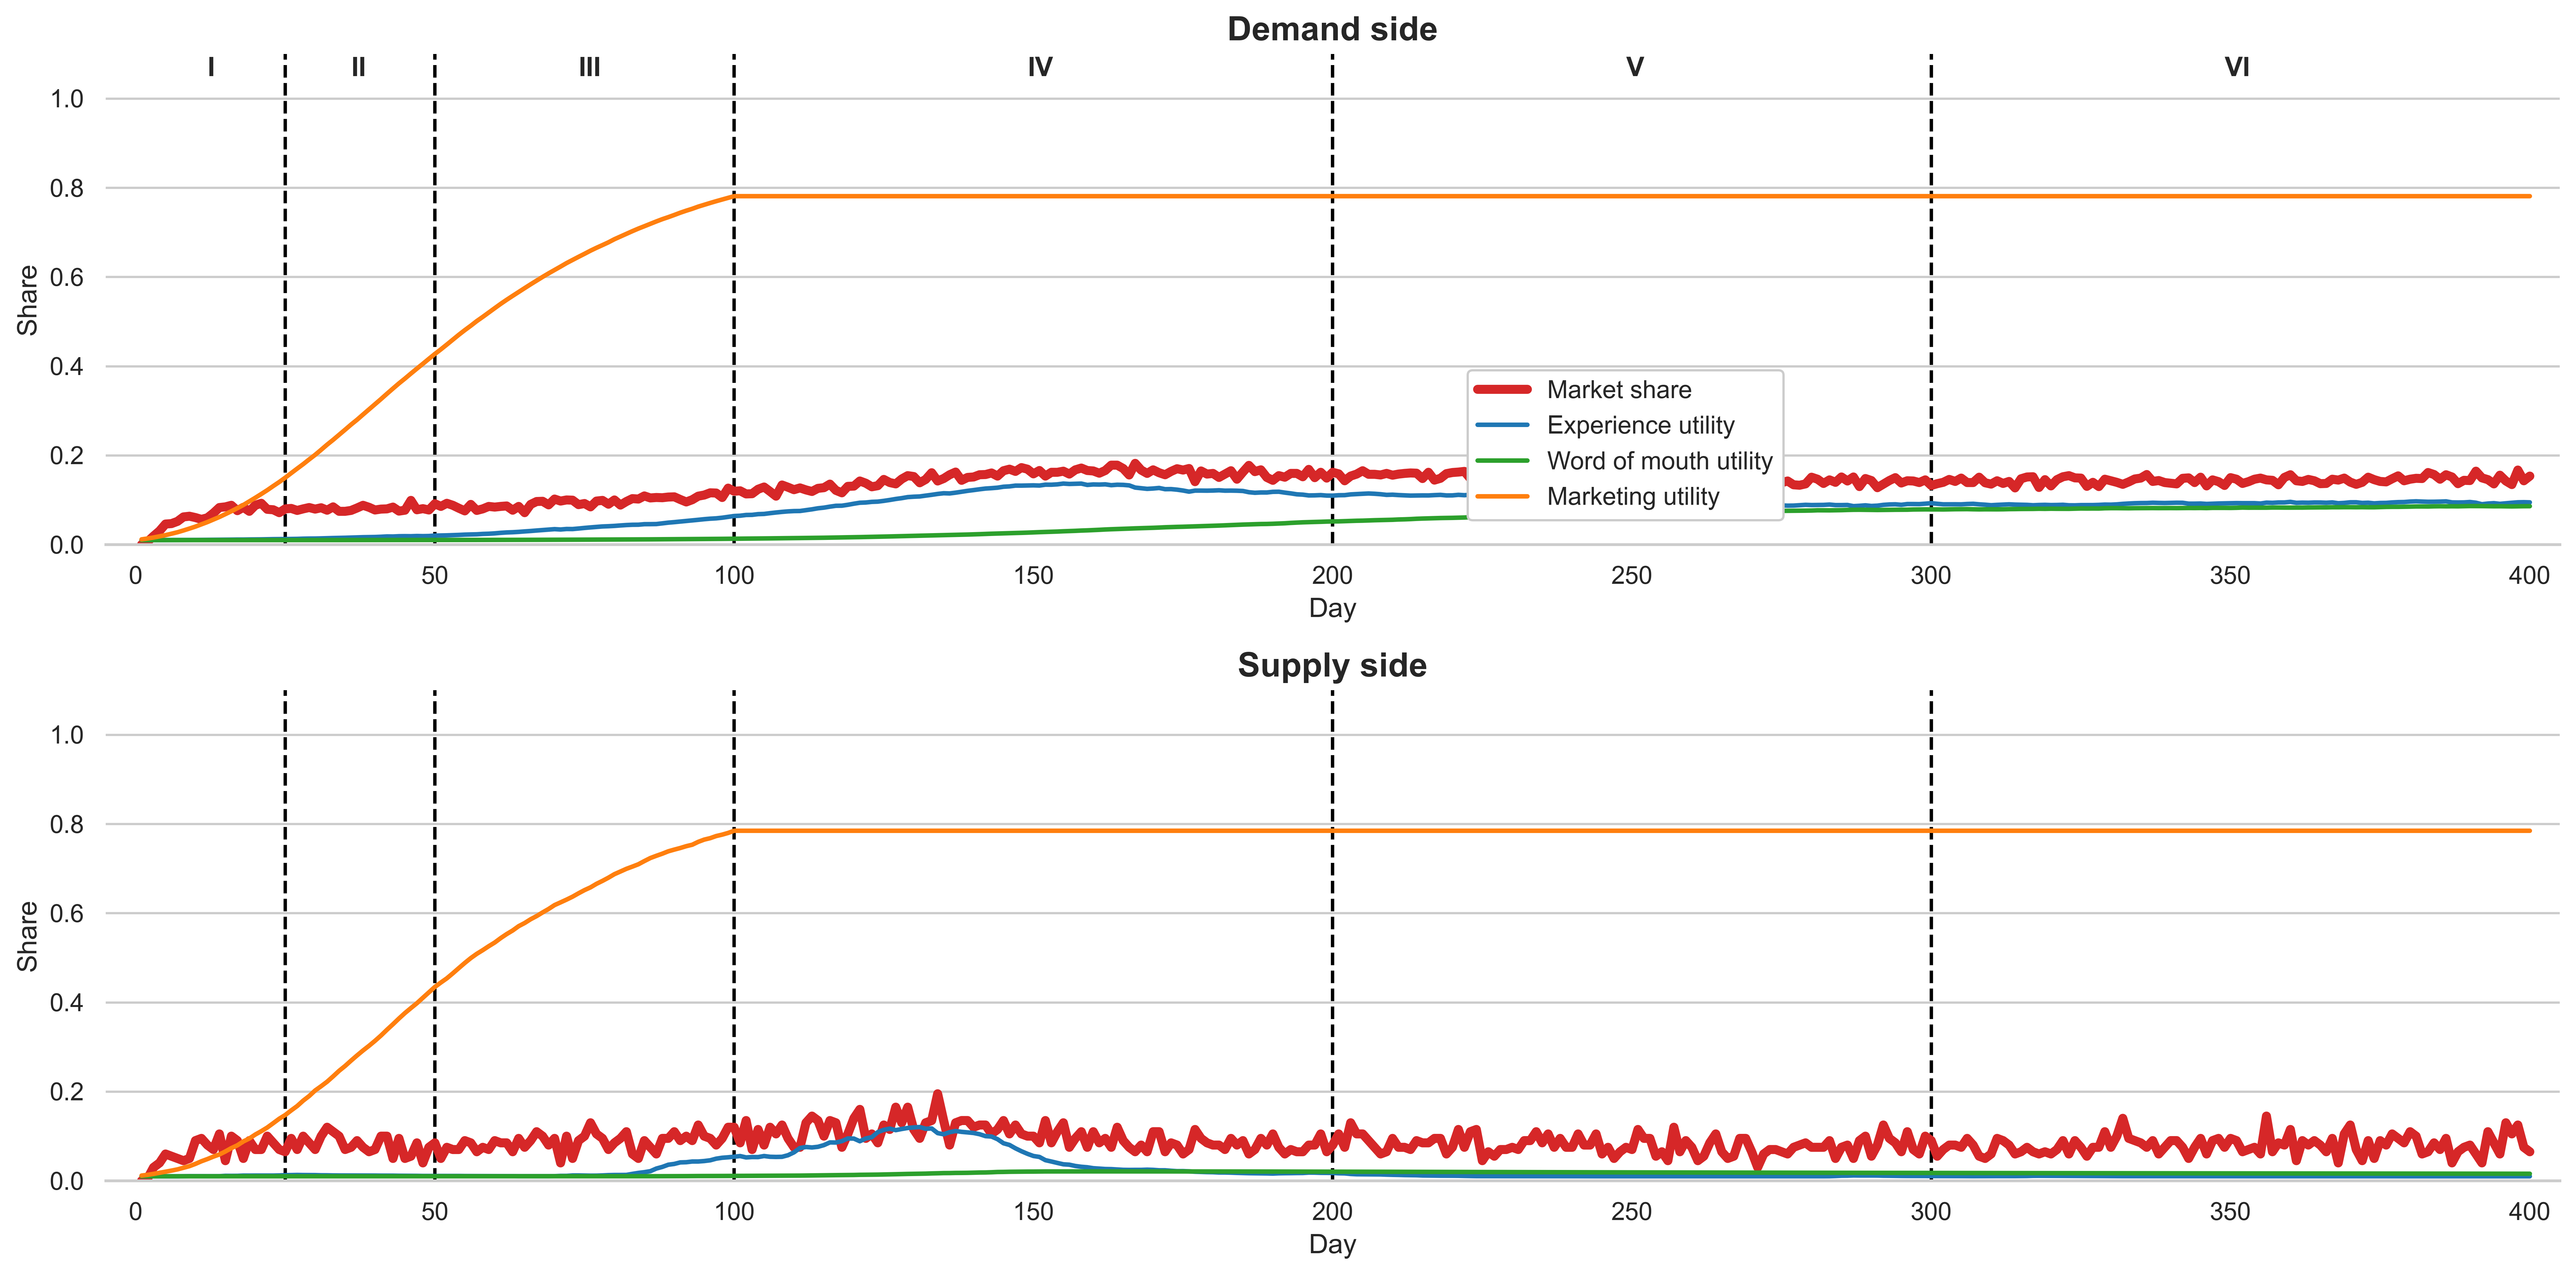

In [8]:
sim0 = sim_rln_train
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim0.params.nD):
            yw.append(sim0.res[d].pax_exp.WOM_U.mean())
            ym.append(sim0.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim0.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim0.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim0.params.nD):
            yw.append(sim0.res[d].veh_exp.WOM_U.mean())
            ym.append(sim0.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim0.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim0.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.05))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

In [ ]:
sim_rln_test,agent_test = MaaSSim.simulators.simulate_RLn_with_agent(input_agent=agent,params=params, f_driver_out=S_driver_opt_out,f_trav_out=S_traveller_opt_out,kpi_veh=d2d_kpi_veh,kpi_pax=d2d_kpi_pax, logger_level=logging.WARNING)

In [ ]:
sim_rln_test.RL.to_csv('../RL_EXP/csv/303030_5x/400_24x24x24_1585_0.001_rev_only_test_3.csv')

In [ ]:
sim0 = sim_rln_test
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim0.params.nD):
            yw.append(sim0.res[d].pax_exp.WOM_U.mean())
            ym.append(sim0.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim0.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim0.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim0.params.nD):
            yw.append(sim0.res[d].veh_exp.WOM_U.mean())
            ym.append(sim0.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim0.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim0.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.05))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

In [ ]:
sim = sim_rln

In [ ]:
sim.res[100].veh_exp

In [ ]:
df = pd.DataFrame()
np = []
nv = []
rev = []
for d in range(0,sim.params.nD):
    np.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
    nv.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    rev.append(sim.res[d].pax_exp.plat_revenue.sum())

df['nP_share'] = np
df['nV_share'] = nv
df['Platform_rev'] = rev

df.to_csv('csv/baseline_fast_rev_only.csv')

In [ ]:
sim.res[100].pax_exp.plat_revenue

In [ ]:
df = pd.read_csv('csv/baseline_fast_h.csv')

In [ ]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=1, figsize=(16,4))
sns.despine(left=True)

sns.lineplot(x=lx,y=df.Platform_rev, lw=4)

In [ ]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=1, figsize=(16,4))
sns.despine(left=True)

sns.lineplot(x=lx,y=df.Platform_rev.cumsum(), lw=4)

In [ ]:
sim.platforms.fare[1]

In [ ]:
sim

In [ ]:
df = pd.read_csv('csv/baseline_fast_rev_0.5nP_0.5nV.csv')
df

In [ ]:
df.Platform_rev.mean()

In [ ]:
df.Platform_rev.mean()

In [ ]:
df.Platform_rev.cumsum()

In [ ]:
df.Platform_rev.mean()

In [ ]:
df.Platform_rev.cumsum()

In [ ]:
df.Platform_rev.mean()

In [ ]:
df.Platform_rev.cumsum()

In [ ]:
df.Platform_rev.mean()

In [ ]:
df.Platform_rev.cumsum()

In [ ]:
20/582

In [ ]:
=====================================================================================

In [ ]:
# nV=100, nP=1000, params.d2d.m = 7, and params.d2d.learning_d = 5
# marketing = 1-100, disc= 100-200, coms_0.5=300-400 

sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].pax_exp.WOM_U.mean())
            ym.append(sim.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].veh_exp.WOM_U.mean())
            ym.append(sim.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.05))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

In [ ]:
# nV=100, nP=1000, params.d2d.m = 7, and params.d2d.learning_d = 2
# marketing = 1-100, disc= 100-200, coms_0.5=300-400 

sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].pax_exp.WOM_U.mean())
            ym.append(sim.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].veh_exp.WOM_U.mean())
            ym.append(sim.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.05))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

In [ ]:
# nV=200, nP=2000, params.d2d.m = 7, and params.d2d.learning_d = 2
# marketing = 1-100, disc= 100-200, coms_0.5=300-400 

sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].pax_exp.WOM_U.mean())
            ym.append(sim.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].veh_exp.WOM_U.mean())
            ym.append(sim.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.05))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

In [ ]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(16,4))
sns.despine(left=True)

x = []
ypr = []

for d in range(0,sim.params.nD):
    df = sim.res[d].pax_exp
    ypr.append(df[df.OUT==False].plat_profit.sum())
x = [i for i in range(1,len(ypr)+1)]

df = pd.Series(ypr).to_frame()
df.columns = ['income']
marketing_costs = 0.5
df['marketing costs']=df.apply(lambda x: -marketing_costs*2200 if x.name >50 and x.name<=100 else 0, axis = 1).astype(int)
df['profit']=df.income + df['marketing costs']

sns.lineplot(x=x, y=df.income.cumsum(), lw=3, label = 'Cumulative revenue', color='C0')#, marker='o')
sns.lineplot(x=x, y=df.profit.cumsum(), lw=3, label = 'Cumulative profit', color='C8')#, marker='o')
sns.lineplot(x=x, y=df['marketing costs'].astype(int).cumsum(), lw=3, label = 'Cumulative cost', color='C1')#, marker='o')

ax.grid(axis='x')
ax.vlines([25, 50, 100, 200, 300], -100000, 325000, linestyles='dashed', colors='black')
# sns.lineplot(x=x, y=ypr, label = 'plat_profit')#, marker='o')
sns.despine(left=True)
ax.set(xlim=(-5,410), ylim=(-100000,325000))
ax.legend(framealpha=1, loc=(0.55,0.72))

value = ['I','II','III','IV','V','VI']
for i in range(0,6):
    coords = [(12,312500),(36,312500),(74,312500),(149,312500),(249,312500),(349,312500)]
    ax.annotate(value[i], xy =coords[i], fontweight='bold')

plt.tight_layout()
# plt.savefig('Fig5.png')

In [ ]:
df = pd.read_csv('csv/baseline_fast.csv')
df

In [ ]:
df.Platform_rev.max()

In [ ]:
2638.8502